# 2. Variable Transformation

### Log Transform

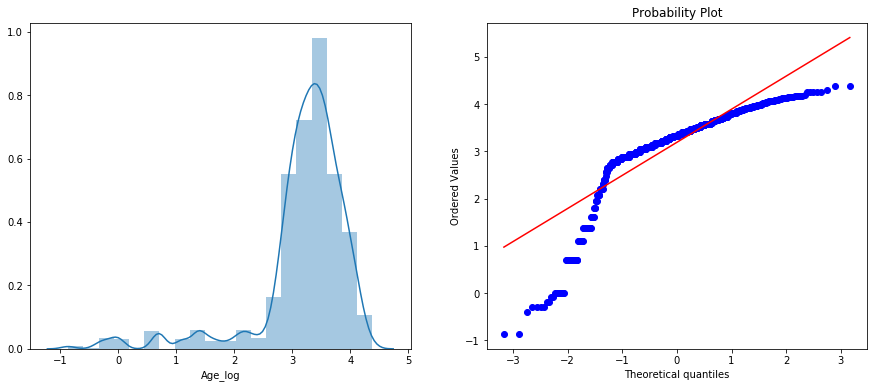

In [12]:
### Logarithmic transformation
df2['Age_log'] = np.log(df2.Age)

diagnostic_plots(df2, 'Age_log')

The logarithmic transformation, did not render a Gaussian like distribution for Age.

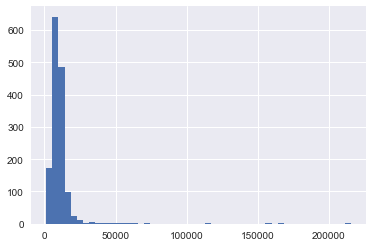

In [4]:
data['LotArea'].hist(bins=50)

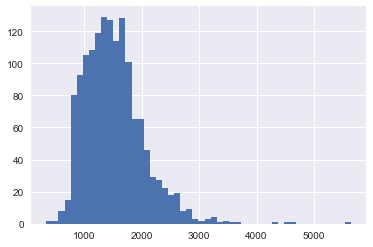

In [5]:
data['GrLivArea'].hist(bins=50)

In [6]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

LogTransformer(variables=['LotArea', 'GrLivArea'])

In [7]:
# variables that will be transformed
lt.variables

['LotArea', 'GrLivArea']

In [8]:
data_tf = lt.transform(data)

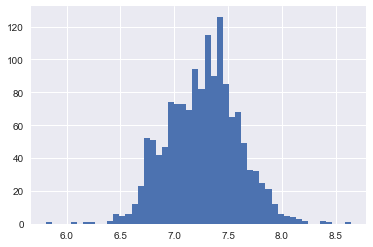

In [9]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

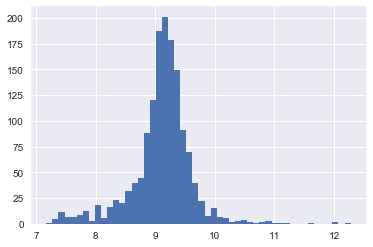

In [10]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

### Reciporal transform

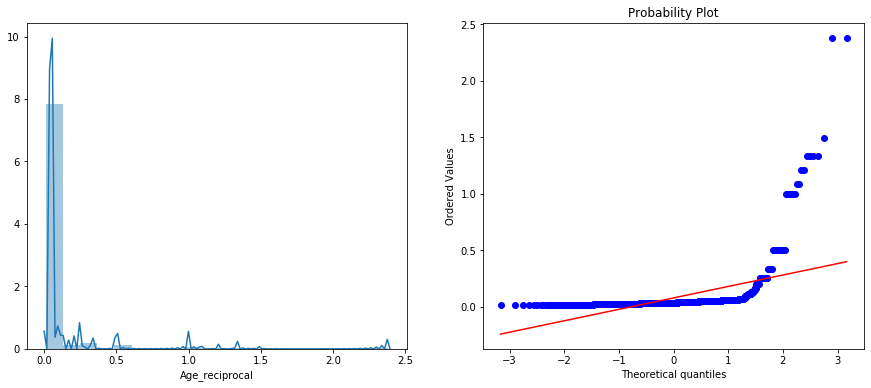

In [13]:
### Reciprocal transformation
df2['Age_reciprocal'] = 1 / df2.Age

diagnostic_plots(df2, 'Age_reciprocal')

In [11]:
data = load_houseprice()

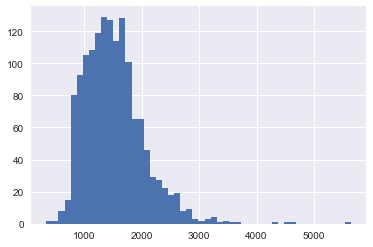

In [12]:
data['GrLivArea'].hist(bins=50)

In [13]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [14]:
data_tf = rt.transform(data)

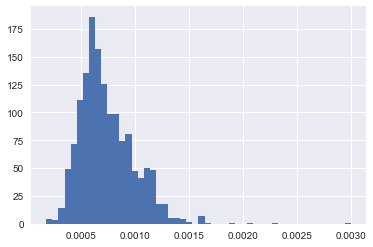

In [15]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

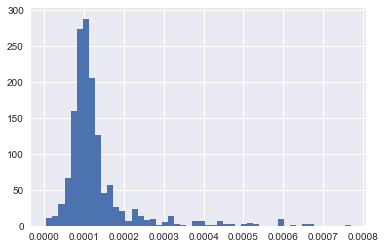

In [16]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

### Square root transform

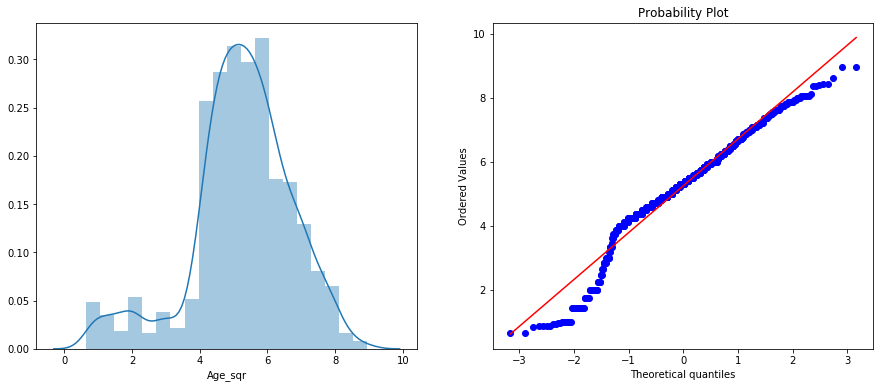

In [14]:
df2['Age_sqr'] = df2.Age**(1/2)

diagnostic_plots(df2, 'Age_sqr')

The square root transformation is a bit more succesful that the previous2 transformations, however, the variable is still not Gaussian, and this does not represent an improvement towards normality respect the original distribution of Age.



### Exponential transform

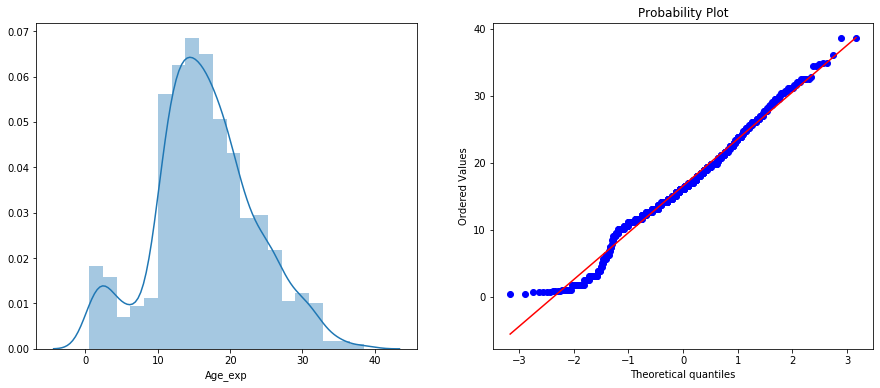

In [15]:
df2['Age_exp'] = df2.Age**(1/1.2) # you can vary the exponent as needed

diagnostic_plots(df2, 'Age_exp')

The exponential transformation is the best of all the transformations above, at the time of generating a variable that is normally distributed. Comparing the histogram and Q-Q plot of the exponentially transformed Age with the original distribution, I would say that by visual inspection the transformed variable follows more closely a Gaussian distribution. 

***Should I transform the variable?***

It depends on what we are trying to achieve. If this was a situation in a business setting, I would use the original variable without transformation to train the model, as this would represent a simpler situation at the time of asking developers to implement the model in real life, and also it will be easier to interpret. If on the other hand this was an exercise to win a data science competition, I would opt to use the variable that gives me the highest performance.

In [17]:
data = load_houseprice()

In [18]:
et = vt.ExponentialTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

ExponentialTransformer(exp=0.5, variables=['LotArea', 'GrLivArea'])

In [19]:
data_tf = et.transform(data)

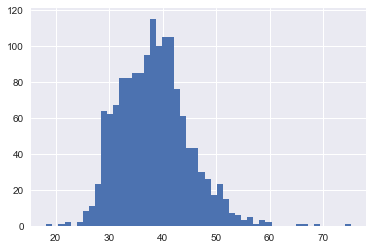

In [20]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

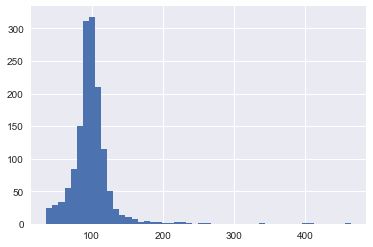

In [21]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

### Boxcox transform

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated. 

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

Optimal λ:  0.7648522500282625


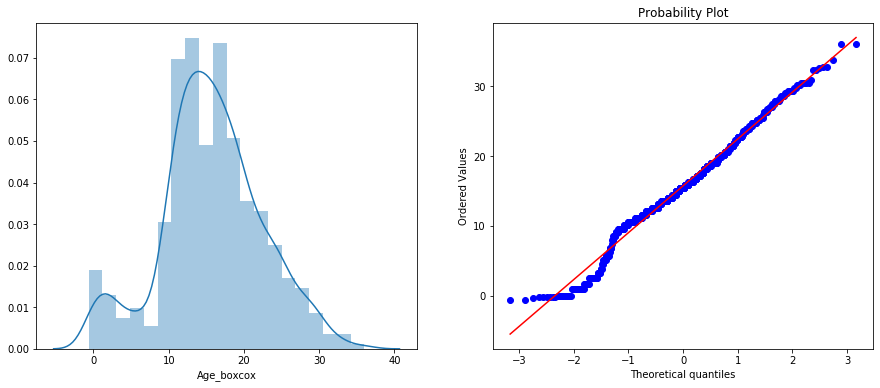

In [16]:
df2['Age_boxcox'], param = stats.boxcox(df2.Age) 

print('Optimal λ: ', param)

diagnostic_plots(df2, 'Age_boxcox')

The Box Cox transformation was as good as the exponential transformation we performed above to make Age look more Gaussian. Whether we decide to proceed with the original variable or the transformed variable, will depend of the purpose of the exercise as described above.

In [22]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [23]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict

{'GrLivArea': 0.0063048860380204392, 'LotArea': 0.030946318971935564}

In [24]:
data_tf = bct.transform(data)

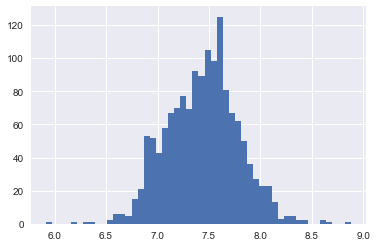

In [25]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

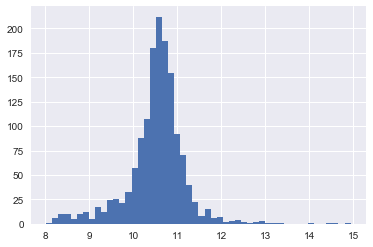

In [26]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

# 3. Mixed Vars

## 6.1. Engineering mixed variables

Mixed variables are those which values contain both numbers and labels. How can we engineer this type of variable to use it in machine learning? What we need to do in these cases is extract the categorical part in one variable, and the numerical part in a different variable. Therefore, we obtain 2 variables from the original one.

**Scenario 1**
Some mixed variables, will contain among their values either strings or numbers, but not the 2 together. This means that the value of an observation is either a string, or a number, but not a string and a number. In situations like this, we can simply extract the string into a categorical variable, and the numbers into a numerical variable. We will end up with 2 variables that contain all the information contained in the single mixed variable. After this, we should engineer the numerical and categorical variables as we would do normally for those types of variables.

**Scenario 2**
In other cases, the variable will contain strings and numbers together for the same observation. After inspecting the variable, we can decide whether we should treat these types as categorical variables, or whether it will be more predictive if we separate the categorical and the numerical parts in different variables.

### 6.1.1. Scenario 1

The variable "Number of installment accounts opened in past 24 months" (LendingClub dataset) installment accounts are those that, at the moment of acquiring them, there is a set period and amount of repayments agreed between the lender and borrower. An example of this is a car loan, or a student loan. the borrower knows that they are going to pay a certain, fixed amount over, for example 36 months.

In [2]:
# let's replace the NaN with the fictitious codes described below:
# 'A': couldn't identify the person
# 'B': no relevant data
# 'C': person seems not to have any account open
# this is exactly what we did in section 2 of this course for the lecture on mixed types of variables

# select which observations we will replace with each code
indeces_b = data[data.open_il_24m.isnull()].sample(100000, random_state=44).index
indeces_c = data[data.open_il_24m.isnull()].sample(300000, random_state=42).index

# replace NA with the fictitious code
data.open_il_24m.fillna('A', inplace=True)
data.loc[indeces_b, 'open_il_24m']='B'
data.loc[indeces_c, 'open_il_24m']='C'

In [3]:
# let's inspect the mixed variable

data.open_il_24m.unique()

array(['C', 'A', 'B', 0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 9.0, 7.0, 8.0,
       13.0, 10.0, 19.0, 11.0, 12.0, 14.0, 15.0], dtype=object)

The variable now is mixed: it contains both numbers and the three codes that we just created for this simulation.

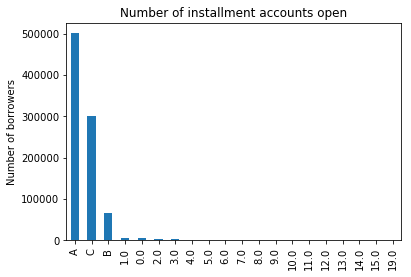

In [4]:
# the variable is also discrete in nature. A person can have 1, 2 accounts but not 2.3 accounts
# let's inspect the number of observations per value of the variable

fig = data.open_il_24m.value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')

This is how a mixed variable looks like!

#### Engineering mixed types of variables

In [6]:
# we create 2 variables, a numerical one containing the numerical part, and
# a categorical variable with the codes (strings)

data['open_il_24m_numerical'] = np.where(data.open_il_24m.str.isdigit(), data.open_il_24m, np.nan)
data['open_il_24m_categorical'] = np.where(data.open_il_24m.str.isdigit(), np.nan, data.open_il_24m,)

data.head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,1077501,C,NaN,C
1,1077430,A,NaN,A
2,1077175,A,NaN,A
3,1076863,A,NaN,A
4,1075358,A,NaN,A


The categorical variable captures the categorical part of the mixed original variable. Where the categorical variable contains a value, the numerical variable contains NA, and vice versa. See below.

In [7]:
# let's inspect those instances of the dataset where numerical is not null
# we can see that when the numerical variable is not null the categorical is null
# and vice versa

data.dropna(subset = ['open_il_24m_numerical'], axis=0)

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
466285,68444620,0,0,NaN
466286,68547583,1,1,NaN
466287,67849662,0,0,NaN
466288,68506885,2,2,NaN
466289,68341763,4,4,NaN
466290,68416935,2,2,NaN
466291,68466916,1,1,NaN
466292,68407277,1,1,NaN
466293,68426831,0,0,NaN
466294,68377020,0,0,NaN


And now we are ready to use those variables in machine learning. We should pre-process them as we learnt in previous sections. For example,  we could fill the missing values of the categorical part with the new category 'Missing'. And then we could fill the NA of the numerical  part with a value far out in the distribution.

### 6.1.2. Scenario 2

In [8]:
# let's load again the titanic dataset for demonstration

data.head()

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN


#### Cabin

In [92]:
# we know from the previous cell that there are 148 different cabins, therefore the variable  is highly cardinal
df2.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

The variables Ticket and Cabin, are not strictly mixed in the sense that they do not contain numbers OR strings on different observations. They contains both numbers and strings in the same observation. Perhaps, if we separate them, we can add some information to the dataset. 

Let's have a look at what we could do:

In [9]:
# for Cabin, it is relatively straightforward, we can extract the letters and the numbers in different variables

data['Cabin_numerical'] = data.Cabin.str.extract('(\d+)') # captures numerical part
data['Cabin_categorical'] = data['Cabin'].str[0] # captures the first letter

data[['Cabin', 'Cabin_numerical', 'Cabin_categorical']].head()

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85,C
2,NaN,NaN,NaN
3,C123,123,C
4,NaN,NaN,NaN


#### Ticket

In [10]:
# ticket is not as clear...but we could still capture the first part of the ticket as a code (category)
# and the second part of the ticket as numeric

data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [11]:
# extract the last bit of ticket as number
data['Ticket_numerical'] = data.Ticket.apply(lambda s: s.split()[-1])
data['Ticket_numerical'] = np.where(data.Ticket_numerical.str.isdigit(), data.Ticket_numerical, np.nan)

# extract the first part of ticket as category
data['Ticket_categorical'] = data.Ticket.apply(lambda s: s.split()[0])
data['Ticket_categorical'] = np.where(data.Ticket_categorical.str.isdigit(), np.nan, data.Ticket_categorical)

data[['Ticket', 'Ticket_numerical','Ticket_categorical']].head(10)

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171,A/5
1,PC 17599,17599,PC
2,STON/O2. 3101282,3101282,STON/O2.
3,113803,113803,NaN
4,373450,373450,NaN
5,330877,330877,NaN
6,17463,17463,NaN
7,349909,349909,NaN
8,347742,347742,NaN
9,237736,237736,NaN


In [12]:
# let's compare the number of categories of the newly designed variables

print('Ticket_original no of labels: ', len(data.Ticket.unique()))
print('Cabin_original no of labels: ', len(data.Cabin.unique()))

print('Ticket_categorical no of labels: ', len(data.Ticket_categorical.unique()))
print('Cabin_categorical no of labels: ', len(data.Cabin_categorical.unique()))


Ticket_original no of labels:  681
Cabin_original no of labels:  148
Ticket_categorical no of labels:  44
Cabin_categorical no of labels:  9


We can see how we reduced quite a bit the number of categories with this simple pre-processing of the variables. Whether these newly designed variables are or not predictive of survival, remains to be tested, built machine learning algorithms with these new variables, and see if they boost the performance.

# 4. Discretisation

### 6.6.3. Discretisation

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values.

#### Discretisation helps handle outliers and highly skewed variables

Discretisation helps handle outliers by placing these values into the lower or higher intervals together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.


#### Discretisation approaches

There are several approaches to transform continuous variables into discrete ones. This process is also known as **binning**, with each bin being each  interval. Discretisation methods fall into 2 categories: **supervised and unsupervised**. Unsupervised methods do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. Supervised methods typically use target information in order to create the bins or intervals.

#####     a) Unsupervised discretisation methods

- Equal width binning
- Equal frequency binning


#####    b) Supervised discretisation methods

- Discretisation using decision trees


In this lecture, I will describe **equal frequency discretisation**, and in the following sections I will expand on the other methods to make variables discrete.


### 6.6.4. Equal frequency discretisation

Equal frequency binning divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. Typically, we find the interval boundaries by determining the quantiles.

Equal frequency discretisation using quantiles consists of **dividing the continuous variable into N quantiles, N to be defined by the user**. There is no rule of thumb to define N. However, if we think of the discrete variable as a categorical variable, where each bin is a category, we would like to keep N (the number of categories) low (typically no more than 10).

Equal frequency binning is straightforward to implement and by spreading the values of the observations more evenly it may help boost the algorithm's performance. On the other hand, this arbitrary binning may also disrupt the relationship with the target on occasions. Therefore, whenever possible, it will bring value to examine whether this type of binning is the right strategy, and it will depend on the variable and the algorithm that we want to use to make the predictions.

In [8]:
usecols = ['Age', 'Fare', 'Survived']
df2 = org_df2.copy()
# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(df2[usecols],df2.Survived, test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

The variable Age contains missing data, that I will fill by extracting a random sample of the variable.

In [9]:
def impute_na(data, variable):
    # function to fill NA with a random sample
    
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

# replace NA in both train and test sets
X_train['Age'] = impute_na(df2, 'Age')
X_test['Age'] = impute_na(df2, 'Age')

### 5.2.1. Age

#### Original distribution

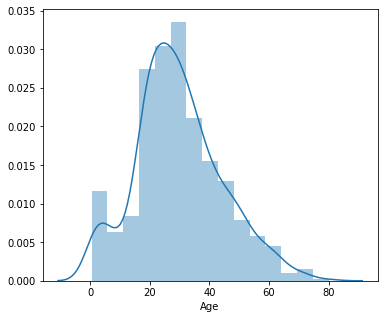

In [10]:
plt.figure(figsize=(6,5))
sns.distplot(df2['Age'], kde=True, bins=15)

**How does survival correlate with Age?**

We can determine the relation between survival and Age by plotting the mean survival per Age. In this case, I will calculate the Survival rate per each year of Age. See below.

Text(0, 0.5, 'Survived')

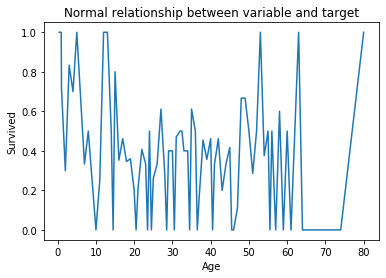

In [11]:
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

By looking at the plot, we get an intuition that younger people (children) were more likely to survive (see higher survival rates at ages below 10 and 10-15). However, it looks like children of 10 years of age, had a very low survival chance. This does not make a lot of sense and most likely indicates that our 10 year old sample is not big enough and then the survival rate is underestimated. Let's see below.

Text(0, 0.5, 'Survived')

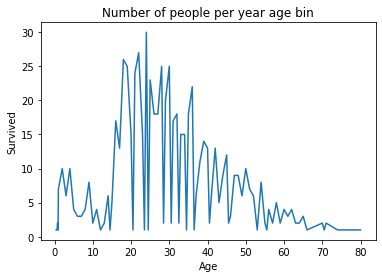

In [12]:
# here I plot the number of passengers within each 1 year age bucket / bin
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].count().plot()
fig.set_title('Number of people per year age bin')
fig.set_ylabel('Survived')

As we suspected, **there were very few children at the age of 10** on the Titanic. If none of them or only half of the 10 year old children survived, we would be led to think that being 10 years old decreased your chances of survival, when in reality, there were only 2 children of the age that were not lucky enough  to survive, therefore leading to underestimation of survival rate.

By grouping Age into bins, we can get a better view of the survival rate depending on the Age of the passenger. Let's see below.

#### Discretisation with quantiles

In [13]:
# Divide Age in 5 bins, use the qcut (quantile cut) function from pandas and I indicate that I want 4 cutting points, thus 5 bins.
# retbins= True indicates that I want to capture the limits of each interval (so I can then use them to cut the test set)

Age_disccretised, intervals = pd.qcut(df2.Age, 4, labels=None, retbins=True, precision=3, duplicates='raise')
pd.concat([Age_disccretised, df2.Age], axis=1).head(10)

,Age,Age
0,"(20.125, 28.0]",22.0000
1,"(28.0, 38.0]",38.0000
2,"(20.125, 28.0]",26.0000
3,"(28.0, 38.0]",35.0000
4,"(28.0, 38.0]",35.0000
5,NaN,nan
6,"(38.0, 80.0]",54.0000
7,"(0.419, 20.125]",2.0000
8,"(20.125, 28.0]",27.0000
9,"(0.419, 20.125]",14.0000


We can see in the above output how by discretising using quantiles, we placed each Age observation within one interval. For example, age 22 was placed in the 20-28 interval, whereas age 38 was placed into the 28-28 interval. We can visualise the interval cut points below.

In [14]:
intervals

array([ 0.42 , 20.125, 28.   , 38.   , 80.   ])

And because we generated the bins using the quantile cut method, we should have roughly the same amount of observations per bin. See below.

In [15]:
# calculate number of passengers per bin
temp = pd.concat([Age_disccretised, df2.Age], axis=1)
temp.columns = ['Age_discretised', 'Age']
temp.groupby('Age_discretised')['Age'].count()

Age_discretised
(0.419, 20.125]    179
(20.125, 28.0]     183
(28.0, 38.0]       175
(38.0, 80.0]       177
Name: Age, dtype: int64

In [16]:
# we can also add labels instead of having the interval boundaries, to the bins, as follows:

Age_disccretised, intervals = pd.qcut(df2.Age, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'], retbins=True, precision=3, duplicates='raise')
Age_disccretised.head()

0    Q2
1    Q3
2    Q2
3    Q3
4    Q3
Name: Age, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [17]:
# and now, I will divide into 10 quantiles for the rest of the exercise. I will leave the quantile
# boundary and generate labels as well for comparison

# create 10 labels, one for each quantile
labels = ['Q'+str(i+1) for i in range(0,10)]
print(labels)

# bins with labels
X_train['Age_disc_label'], bins = pd.qcut(x=X_train.Age, q=10, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['Age_disc'], bins = pd.qcut(x=X_train.Age, q=10, retbins=True, precision=3, duplicates='raise')


X_train.head(10)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']


,Age,Fare,Survived,Age_disc_label,Age_disc
857,51.0000,26.5500,1,Q10,"(49.0, 80.0]"
52,49.0000,76.7292,1,Q9,"(41.6, 49.0]"
386,1.0000,46.9000,0,Q1,"(0.669, 13.2]"
124,54.0000,77.2875,0,Q10,"(49.0, 80.0]"
578,14.5000,14.4583,0,Q2,"(13.2, 19.0]"
549,8.0000,36.7500,1,Q1,"(0.669, 13.2]"
118,24.0000,247.5208,0,Q4,"(22.0, 26.0]"
12,20.0000,8.0500,0,Q3,"(19.0, 22.0]"
157,30.0000,8.0500,0,Q6,"(29.0, 32.0]"
127,24.0000,7.1417,1,Q4,"(22.0, 26.0]"


Age 51 was placed into the 49-80 bucket, which is also the last bucket (Q10) in our distribution, as it contains the majority of the elder people. The age of 8 was placed into the 0-13 bucket, which is the first interval (Q1) of the discretised variable. And below the interval limits.

In [18]:
bins

array([ 0.67, 13.2 , 19.  , 22.  , 26.  , 29.  , 32.  , 36.  , 41.6 ,
       49.  , 80.  ])

To divide the test set, we will use the cut method of pandas, and we will pass the interval edges above. 

As with all feature engineering methods, the limits of the intervals should be set on the training set, and then propagated to the test set. We should not calculate the quantiles in the test set. We should use the limits estimated using the train set data. If the distributions are similar, we should expect to have roughly the same amount of observations in each age bucket in the test set as well.

In [19]:
# we use pandas cut method and pass the quantile edges calculated in the training set
X_test['Age_disc_label'] = pd.cut(x = X_test.Age, bins=bins, labels=labels)
X_test['Age_disc'] = pd.cut(x = X_test.Age, bins=bins)

X_test.head()

,Age,Fare,Survived,Age_disc_label,Age_disc
495,42.0000,14.4583,0,Q9,"(41.6, 49.0]"
648,18.0000,7.5500,0,Q2,"(13.2, 19.0]"
278,7.0000,29.1250,0,Q1,"(0.67, 13.2]"
31,35.0000,146.5208,1,Q7,"(32.0, 36.0]"
255,29.0000,15.2458,1,Q5,"(26.0, 29.0]"


In [20]:
# let's check that we have equal frequency (equal number of observations per bin)
X_test.groupby('Age_disc')['Age'].count()

Age_disc
(0.67, 13.2]    26
(13.2, 19.0]    38
(19.0, 22.0]    24
(22.0, 26.0]    33
(26.0, 29.0]    21
(29.0, 32.0]    25
(32.0, 36.0]    22
(36.0, 41.6]    22
(41.6, 49.0]    23
(49.0, 80.0]    32
Name: Age, dtype: int64

#### Discretisation by quantiles guarantees same number of observations in each partition/bin/interval

In [21]:
t1 = X_train.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_train))
t1

Age_disc
(0.669, 13.2]   0.1011
(13.2, 19.0]    0.1156
(19.0, 22.0]    0.0883
(22.0, 26.0]    0.1140
(26.0, 29.0]    0.0995
(29.0, 32.0]    0.0883
(32.0, 36.0]    0.1091
(36.0, 41.6]    0.0835
(41.6, 49.0]    0.1059
(49.0, 80.0]    0.0947
Name: Survived, dtype: float64

In [22]:
t2 = X_test.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_test))
t2

Age_disc
(0.67, 13.2]   0.0970
(13.2, 19.0]   0.1418
(19.0, 22.0]   0.0896
(22.0, 26.0]   0.1231
(26.0, 29.0]   0.0784
(29.0, 32.0]   0.0933
(32.0, 36.0]   0.0821
(36.0, 41.6]   0.0821
(41.6, 49.0]   0.0858
(49.0, 80.0]   0.1194
Name: Survived, dtype: float64

In [23]:
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp

,train,test
Age_disc,,
"(0.669, 13.2]",0.1011,nan
"(0.67, 13.2]",nan,0.0970
"(13.2, 19.0]",0.1156,0.1418
"(19.0, 22.0]",0.0883,0.0896
"(22.0, 26.0]",0.1140,0.1231
"(26.0, 29.0]",0.0995,0.0784
"(29.0, 32.0]",0.0883,0.0933
"(32.0, 36.0]",0.1091,0.0821
"(36.0, 41.6]",0.0835,0.0821


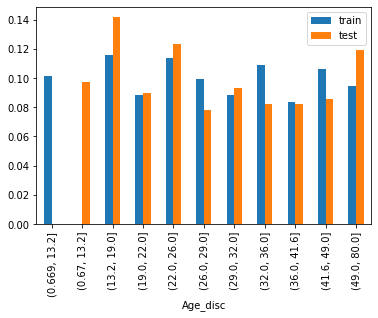

In [24]:
temp.plot.bar()

Indeed, we see roughly the same frequency per interval in both training and testing set.

Text(0, 0.5, 'Survived')

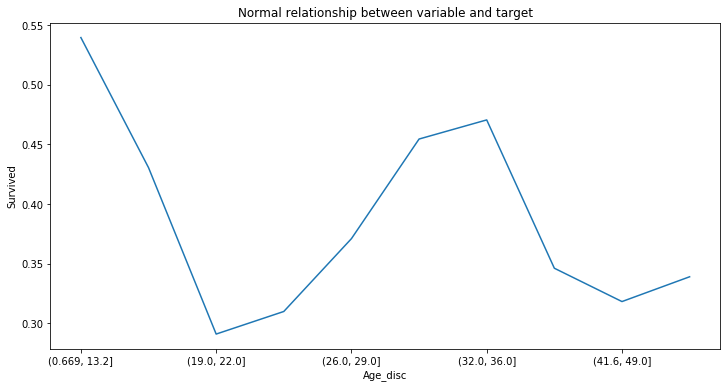

In [25]:
# and now let's observe the relationship between age and survival again, using the discrete Age transformed 
# variable

fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Using discretisation we capture more clearly the survival rate according to the age of the passenger. We can see that children (<18) were the most likely to survive, and people in the early 30s as well, potentially mother with children, whereas people between 20-30 and older than 35 were the less likely to survive the tragedy.

Now that we have a discrete variable, we can go ahead and preprocess it as categorical variable, to squeeze a bit more performance out of the machine learning algorithm. Why not ordering the bins according to survival rate?

#### Combine discretisation with label ordering according to target

You can revise the lectures on engineering categorical variables to re-cap on how to preprocess labels.

For this demonstration I will assign ordinal numbers to the different bins, according to the survival rate per bin.

In [26]:
# order the intervals according to survival rate
ordered_labels = X_train.groupby(['Age_disc_label'])['Survived'].mean().sort_values().index

# number the intervals according to survival rate
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

# remap the intervals to the encoded variable
X_train['Age_disc_ordered'] = X_train.Age_disc_label.map(ordinal_label)
X_test['Age_disc_ordered'] = X_test.Age_disc_label.map(ordinal_label)

X_train.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered
857,51.0000,26.5500,1,Q10,"(49.0, 80.0]",3
52,49.0000,76.7292,1,Q9,"(41.6, 49.0]",2
386,1.0000,46.9000,0,Q1,"(0.669, 13.2]",9
124,54.0000,77.2875,0,Q10,"(49.0, 80.0]",3
578,14.5000,14.4583,0,Q2,"(13.2, 19.0]",6


Text(0, 0.5, 'Survived')

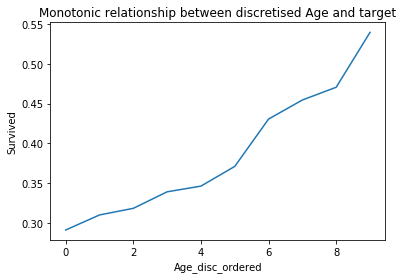

In [27]:
# plot the monotonic relationship
fig = plt.figure()
fig = X_train.groupby(['Age_disc_ordered'])['Survived'].mean().sort_values(ascending = True).plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

Go ahead and compare the performance machine learning algorithms using the original distribution of Age, Age discretised using quantiles and Age in quantiles followed by ordering according to Survival rate. Enjoy!

### 5.2.2. Fare

Let's look at the benefit that can be bought forward by equal frequency discretisation on highly skewed variables like Fare.

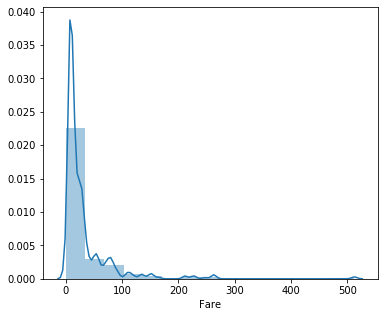

In [28]:
plt.figure(figsize=(6,5))
sns.distplot(df2['Fare'], kde=True, bins=15)

Text(0, 0.5, 'Survived')

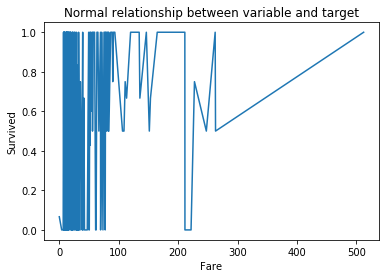

In [29]:
# let's plot survival rate per ticket price
fig = plt.figure()
fig = df2.groupby(['Fare'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

The relationship between Fare and survival is not very clear from this plot. It looks very noisy for the lowest fares, and the survival rate was highest for highest fares, however, there were very few people that paid > 500 dollars, so most likely that survival rate is inflated.

Let's go ahead and discretise Fare using equal frequency intervals, and plot again the survival rate and the number of observations within bins.

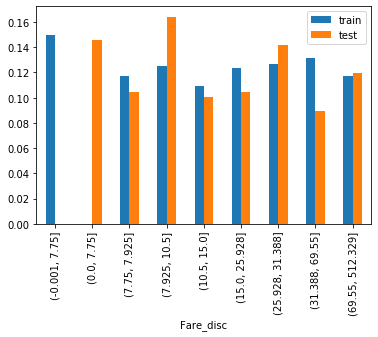

In [30]:
# calculate quantile boundaries on train set and create the discrete variable
X_train['Fare_disc'], bins = pd.qcut(x=X_train.Fare, q=8, retbins=True, precision=3, duplicates='raise')

# cut test set using bin boundaries estimated above
X_test['Fare_disc'] = pd.cut(x = X_test.Fare, bins=bins)

# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
t1 = X_train.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()

Indeed, we have now spread the observations evenly for all the intervals in both train and test set. Let's go ahead and plot the survival rate per Fare once again.

Text(0, 0.5, 'Survived')

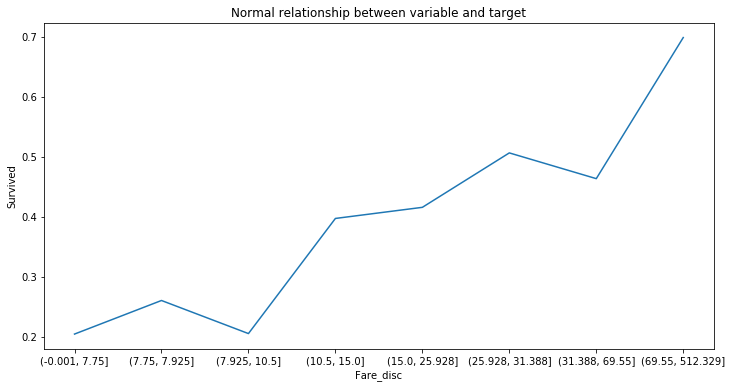

In [31]:
# let's plot survival rate per ticket price bin
fig = plt.figure()
fig = X_train.groupby(['Fare_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Now we get a much clearer view and as we have similar amount of passengers within each bucket, we can be confident that the conclusions are fair. We can see, clearly, that people that paid the highest Fares (>68 dollars) were the most likely to survive, and people who paid the lowest Fares (<10 dollars) were the less likely to survive. Sad but true.

### 6.6.4. Equal width discretisation

Equal width binning divides the scope of possible values into N bins of the same width. **The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable**.

width = (max value - min value) / N

For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).

There is no rule of thumb to define N. Typically, we would not want more than 10.

I will demonstrate how to perform equal width binning using the Titanic dataset.

### 5.3.1. Age

#### Original distribution

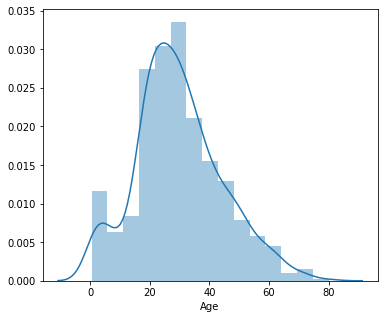

In [32]:
plt.figure(figsize=(6,5))
sns.distplot(df2['Age'], kde=True, bins=15)

**How does survival correlate with Age?**

We can determine the relation between survival and Age by plotting the mean survival per Age. In this case, I will calculate the Survival rate per each year of Age. See below.

Text(0, 0.5, 'Survived')

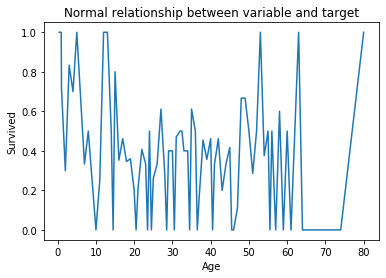

In [33]:
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

By looking at the plot, we get an intuition that younger people (children) were more likely to survive (see higher survival rates at ages below 10 and 10-15). However, it looks like children of 10 years of age, had a very low survival chance. This does not make a lot of sense and most likely indicates that our 10 year old sample is not big enough and then the survival rate is underestimated. Let's see below.

Text(0, 0.5, 'Survived')

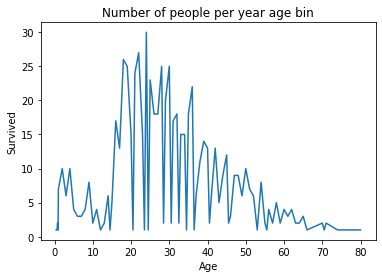

In [34]:
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].count().plot()
fig.set_title('Number of people per year age bin')
fig.set_ylabel('Survived')

As we suspected, there were very few children at the age of 10 on the Titanic. If none of them or only half of the 10 year old children survived, we would be led to think that being 10 years old decreased your chances of survival, when in reality, there were only 2 children of the age that were not lucky enough  to survive, therefore leading to underestimation of survival rate.

By grouping Age into bins, we can get a better view of the survival rate depending on the Age of the passenger. Let's see below.

#### Discretisation with range

In [35]:
# let's capture the range of the variable age to begin with

Age_range = X_train.Age.max() - X_train.Age.min()
Age_range

79.33

In [36]:
# let's divide the range into 10 equal width bins

Age_range/10

7.933

The range or width of our intervals will be 8 years.

In [37]:
# not let's capture the lower and upper boundaries

min_value = int(np.floor(X_train.Age.min()))
max_value = int(np.ceil(X_train.Age.max()))

# let's round the bin width
inter_value = int(np.round(Age_range/10))

min_value, max_value, inter_value

(0, 80, 8)

In [38]:
# let's capture the interval limits, so we can pass them to the pandas cut function to generate
# the bins

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

In [39]:
# let's make labels to label the different bins
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10']

In [40]:
# create binned age

# create one column with labels
X_train['Age_disc_labels'] = pd.cut(x = X_train.Age, bins=intervals, labels=labels, include_lowest=True)

# and one with bin boundaries
X_train['Age_disc'] = pd.cut(x = X_train.Age, bins=intervals, include_lowest=True)

X_train.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered,Fare_disc,Age_disc_labels
857,51.0000,26.5500,1,Q10,"(48.0, 56.0]",3,"(25.928, 31.388]",Bin_7
52,49.0000,76.7292,1,Q9,"(48.0, 56.0]",2,"(69.55, 512.329]",Bin_7
386,1.0000,46.9000,0,Q1,"(-0.001, 8.0]",9,"(31.388, 69.55]",Bin_1
124,54.0000,77.2875,0,Q10,"(48.0, 56.0]",3,"(69.55, 512.329]",Bin_7
578,14.5000,14.4583,0,Q2,"(8.0, 16.0]",6,"(10.5, 15.0]",Bin_2


We can see in the above output how by discretising using equal width, we placed each Age observation within one interval /bin. For example, age 51 was placed in the 48-56 interval, whereas age 14.5 was placed into the 8-16 interval.

Because we discretised the variable using equal width intervals instead of equal frequency, there won't necessarily be the same amount of passengers in each of the intervals. See below.

In [41]:
X_train.groupby('Age_disc')['Age'].count()

Age_disc
(-0.001, 8.0]     49
(8.0, 16.0]       36
(16.0, 24.0]     147
(24.0, 32.0]     146
(32.0, 40.0]     112
(40.0, 48.0]      68
(48.0, 56.0]      37
(56.0, 64.0]      19
(64.0, 72.0]       7
(72.0, 80.0]       2
Name: Age, dtype: int64

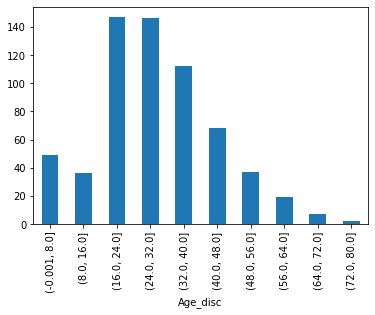

In [42]:
X_train.groupby('Age_disc')['Age'].count().plot.bar()

The majority of people on the Titanic were between 16-40 years of age.

Now, we can discretise Age in the test set, using the same interval boundaries that we calculated for the train set. See below.

In [43]:
X_test['Age_disc_labels'] = pd.cut(x = X_test.Age, bins=intervals, labels=labels, include_lowest=True)
X_test['Age_disc'] = pd.cut(x = X_test.Age, bins=intervals,  include_lowest=True)

X_test.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered,Fare_disc,Age_disc_labels
495,42.0000,14.4583,0,Q9,"(40.0, 48.0]",2,"(10.5, 15.0]",Bin_6
648,18.0000,7.5500,0,Q2,"(16.0, 24.0]",6,"(0.0, 7.75]",Bin_3
278,7.0000,29.1250,0,Q1,"(-0.001, 8.0]",9,"(25.928, 31.388]",Bin_1
31,35.0000,146.5208,1,Q7,"(32.0, 40.0]",8,"(69.55, 512.329]",Bin_5
255,29.0000,15.2458,1,Q5,"(24.0, 32.0]",5,"(15.0, 25.928]",Bin_4


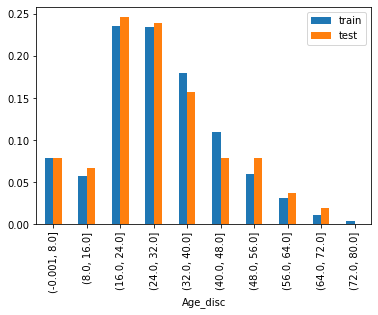

In [44]:
# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
# let's see that below

t1 = X_train.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()


Indeed, the proportion of passengers within each bin is roughly the same.

Text(0, 0.5, 'Survived')

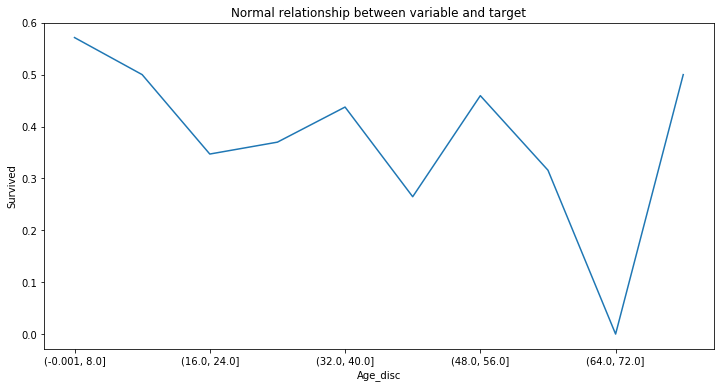

In [45]:
# and now let's observe the relationship between age and surival again, using the discrete Age transformed 
# variable

fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'No of Passengers')

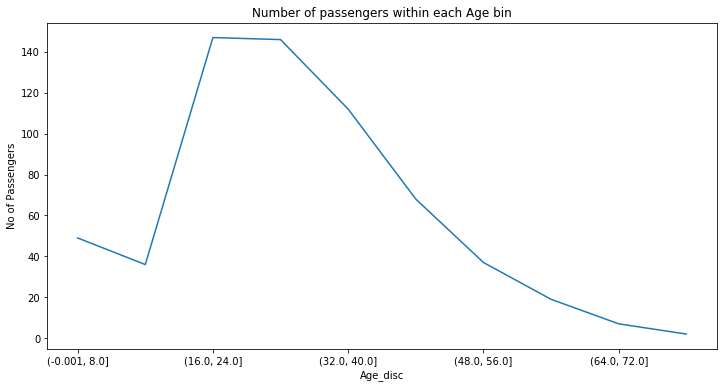

In [46]:
fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].count().plot(figsize=(12,6))
fig.set_title('Number of passengers within each Age bin')
fig.set_ylabel('No of Passengers')

In this case, by dividing Age into bins, we removed some of the noise plotted in the previous graph (a few cells ago) using the untransformed Age. Using the discrete variable Age, we observe as expected that children (<16) had the highest survival chance.

What happens to older people is less clear from the discrete variable. It looks like people between 32-40 and 48-56 are more likely to survive, than people from 40-48. This might or might not be true and more research would be needed to determine if this was the case, what the reason behind it was. In addition, it looks like being extremely old, was very favourable for survival (look at the 72-80 bucket). However, most likely, these are consequences of an arbitrary binning strategy. There are very few people in the bucket 72-80, and thus, the fact that 1 of them survived inflates (overestimates) the survival rate for that bucket. And the same is true for the remaining of the bins, the lowest the amount of observations within buckets, the highest the risk of over or underestimating the target (survival in this case). So we begin to see some of the consequences of this binning strategy.

Similarly to what we did with the equal frequency discretised Age variable in the previous lecture, here as well to squeeze a bit more performance out of the machine learning algorithm, we can add a layer of transformation by sorting the bins using the survival rate (the caveat being that the survival rate may be over or underestimated as we explained in the previous paragraph). But just for a demonstration, let's go ahead. See below.

#### Combine discretisation with label ordering according to target

You can revise the lectures on engineering categorical variables to re-cap on how to preprocess labels.

For this demonstration I will assign ordinal numbers to the different bins, according to the survival rate per bin.

In [47]:
# order the bins according to survival rate
ordered_labels = X_train.groupby(['Age_disc_labels'])['Survived'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}

# transformed the discrete age variable
X_train['Age_disc_ordered'] = X_train.Age_disc_labels.map(ordinal_label)
X_test['Age_disc_ordered'] = X_test.Age_disc_labels.map(ordinal_label)

Text(0, 0.5, 'Survived')

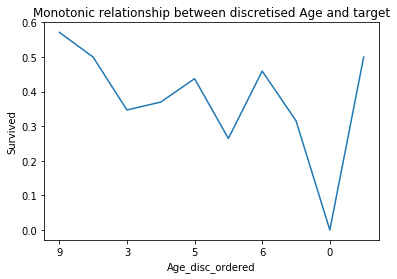

In [48]:
fig = plt.figure()
fig = X_train.groupby(['Age_disc_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

### 5.3.2. Fare

Let's look at the consequences of equal width discretisation on highly skewed variables like Fare.

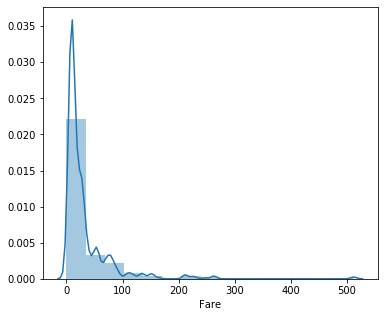

In [49]:
plt.figure(figsize=(6,5))
sns.distplot(X_train['Fare'], kde=True, bins=15)

In [50]:
Fare_range = X_train.Fare.max() - X_train.Fare.min()
Fare_range

512.3292

In [51]:
min_value = int(np.floor(X_train.Fare.min()))
max_value = int(np.ceil(X_train.Fare.max()))
inter_value = int(np.round(Fare_range/10))

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[0, 51, 102, 153, 204, 255, 306, 357, 408, 459, 510, 561]

In [52]:
len(intervals)

12

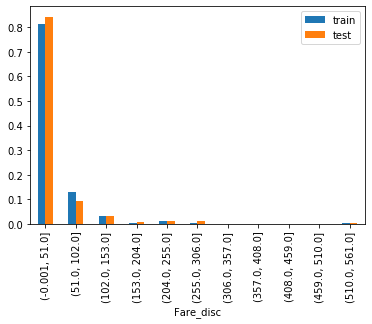

In [53]:
X_train['Fare_disc'] = pd.cut(x = X_train.Fare, bins=intervals, include_lowest=True)
X_test['Fare_disc'] = pd.cut(x = X_test.Fare, bins=intervals, include_lowest=True)

# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
t1 = X_train.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()

For very skewed variables, discretisation using range is not a good option, as it ends up putting the majority of the observations within 1 or 2 buckets, and the remaining are almost empty or empty.

For very skewed variables, quantile discretisation may be a better choice.

### 6.6.5. Domain knowledge discretisation

Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. These intervals may be defined both arbitrarily or following some criteria of use to the business. Typical examples are the discretisation of variables like Age and Income. 

Income for example is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per Age, it is usually divided in certain groups according to the business need, for example division into  0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.

### 5.4.1. Age

#### Original distribution

In [54]:
df2.Age.describe()

count   714.0000
mean     29.6991
std      14.5265
min       0.4200
25%      20.1250
50%      28.0000
75%      38.0000
max      80.0000
Name: Age, dtype: float64

In [55]:
# let's divide Age into the buckets that we described in the intro cell

# bucket boundaries
buckets = [0,20,40,60,1000]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
df2['Age_buckets_labels'] = pd.cut(df2.Age, bins=buckets, labels = labels, include_lowest=True)
df2['Age_buckets'] = pd.cut(df2.Age, bins=buckets, include_lowest=True)

df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_buckets_labels,Age_buckets
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,20-40,"(20.0, 40.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,20-40,"(20.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40,"(20.0, 40.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S,20-40,"(20.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S,20-40,"(20.0, 40.0]"


In [56]:
df2.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_buckets_labels,Age_buckets
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S,20-40,"(20.0, 40.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S,0-20,"(-0.001, 20.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C,20-40,"(20.0, 40.0]"
890,891,0,3,"Dooley, Mr. Patrick",male,32.0000,0,0,370376,7.7500,NaN,Q,20-40,"(20.0, 40.0]"


Above we can observe the buckets into which each Age observation was placed. For example, age 27 was placed into the 20-40 bucket.

Let's explore the number of observations and survival rate per bucket after this arbitrary discretisation method.

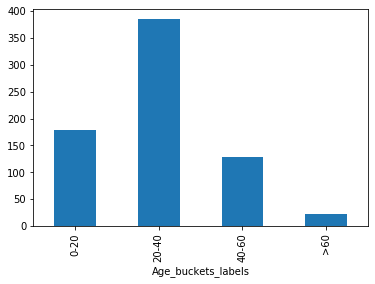

In [57]:
# number of passengers per age bucket
df2.groupby('Age_buckets_labels')['Age'].count().plot.bar()

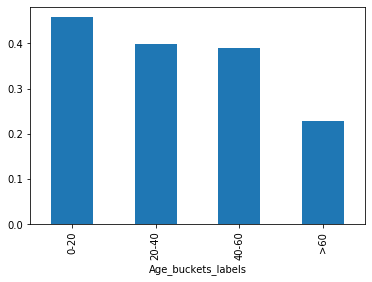

In [58]:
# survival rate per age bucket
df2.groupby('Age_buckets_labels')['Survived'].mean().plot.bar()

The majority of people on the Titanic were between 20-40 years of age. We can see that all the age bins have the same Survival rate. Therefore, most likely, this is not a good method of grouping the Age variable to improve model predictive performance.

**So when would we use a discretisation method like this?**

Well for example, if the business was organising marketing campaigns, and they decide that they will run 4 different marketing campaigns each one targeting each of this buckets, then, dividing age into these groups makes sense for further analysis.

### 5.4.2. annual_inc (Lending Club)

Let's explore discretisation using domain knowledge in a different business scenario. I will use the loan book from the peer to peer lending company Lending Club. This dataset contains information on loans given to people, and the financial characteristics of those people as well as the loan performance.

In [63]:
# I will load only the income declared by the borrower for the demonstration

df1 = org_df1[['annual_inc']].copy()
df1.head()

,annual_inc
0,55000.0000
1,90000.0000
2,59280.0000
3,92000.0000
4,57250.0000


In [64]:
df1.annual_inc.describe()

count     2260664.0000
mean        77992.4287
std        112696.1996
min             0.0000
25%         46000.0000
50%         65000.0000
75%         93000.0000
max     110000000.0000
Name: annual_inc, dtype: float64

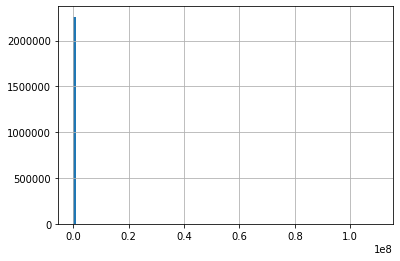

In [65]:
# let's inspect the distribution of Incomes
df1.annual_inc.hist(bins=100)

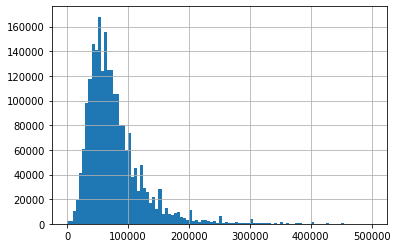

In [67]:
# and now let's look at the lower incomes in more detail
df1[df1.annual_inc<500000].annual_inc.hist(bins=100)

We can see that the majority of the population earns below 150,000. So we may want to make a cap there.

In [68]:
df1[df1.annual_inc<500000].describe()

,annual_inc
count,2256489.0000
mean,76359.1043
std,46930.9115
min,0.0000
25%,46000.0000
50%,65000.0000
75%,93000.0000
max,499992.0000


In [69]:
# and now let's divide into arbitrary buckets, assuming that these make business sense

# bucket interval
buckets = [0,45000,65000,90000,150000,1e10]

# bucket labels
labels = ['0-45k', '45-65k', '65-90k','90-150k', '>150k']

# discretisation
df1['Income_buckets'] = pd.cut(df1.annual_inc, bins=buckets, labels = labels, include_lowest=True)
df1.head()

,annual_inc,Income_buckets
0,55000.0000,45-65k
1,90000.0000,65-90k
2,59280.0000,45-65k
3,92000.0000,90-150k
4,57250.0000,45-65k


In [70]:
df1.tail()

,annual_inc,Income_buckets
2260663,58000.0000,45-65k
2260664,30000.0000,0-45k
2260665,64000.0000,45-65k
2260666,60000.0000,45-65k
2260667,60000.0000,45-65k


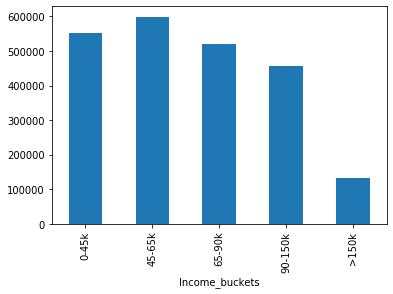

In [71]:
df1.groupby(['Income_buckets'])['annual_inc'].count().plot.bar()

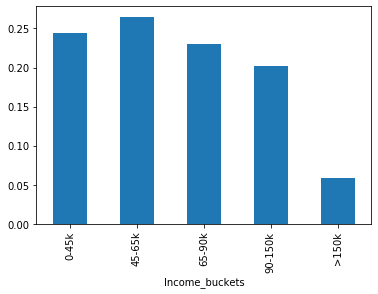

In [73]:
(df1.groupby(['Income_buckets'])['annual_inc'].count()/np.float(len(df1))).plot.bar()

We  have captured ~equal amount of borrowers in each of the first 3 buckets, and we see clearly, that a smaller percentage of the loans were disbursed to high earners.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

### 6.6.6. Discretisation with Decision Trees

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values. **Supervised discretisation** methods use target information to create the contiguous bins or intervals. Several supervised discretisation methods have been described, see for example the article [Discretisation: An Enabling technique](http://www.public.asu.edu/~huanliu/papers/dmkd02.pdf) for a summary.

However, I have only seen the discretisation using decision trees being used both in Data Science competitions and business settings:

Discretisation using trees was implemented by the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

It is also used in a peer to peer lending company in the UK. See this [blog](https://blog.zopa.com/2017/07/20/tips-honing-logistic-regression-models/) for details of the benefit of using  discretisation using decision trees.


Discretisation with Decision Trees consists of using a decision tree to identify the optimal splitting points that would determine the bins or contiguous intervals: 
- First, it trains a decision tree of limited depth (2, 3  or 4) using the variable we want to discretise to predict the target.
- The original variable values are then replaced by the probability returned by the tree. The probability is the same for all the observations within a single bin, thus replacing by the probability is equivalent to grouping the observations within the cut-off decided by the decision tree.

### Advantages

- The probabilistic predictions returned decision tree are monotonically related to the target.
- The new bins show decreased entropy, this is the observations within each bucket / bin are more similar to themselves than to those of other buckets / bins.
- The tree finds the bins automatically

### Disadvantages
- It may cause over-fitting
- More importantly, some tuning of tree parameters need to be done to obtain the optimal splits (e.g., depth, minimum number of samples in one partition, maximum number of partitions, and a minimum information gain). This it can be time consuming.


Below, I will demonstrate how to perform discretisation with decision trees using the Titanic dataset.

### 6.6.6. Discretisers

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

from feature_engine import discretisers as dsc

In [2]:
def load_houseprice():
    data = pd.read_csv('houseprice.csv')
    return data

In [3]:
data = load_houseprice()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
var_no_nulls = [x for x in data.columns if data[x].isnull().sum()==0 and data[x].dtypes !='O']

data[var_no_nulls].dtypes

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

## EqualFrequencyDiscretiser

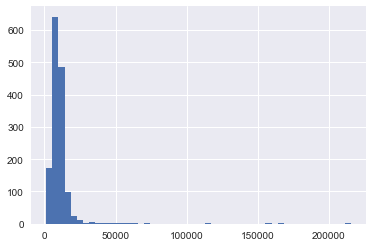

In [5]:
data['LotArea'].hist(bins=50)

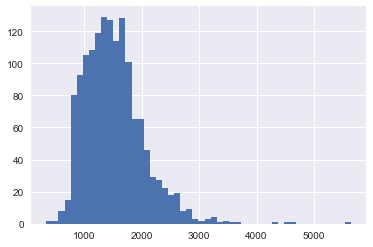

In [6]:
data['GrLivArea'].hist(bins=50)

In [7]:
efd = dsc.EqualFrequencyDiscretiser(q=10, variables = ['LotArea', 'GrLivArea'])
efd.fit(data)

EqualFrequencyDiscretiser(q=10, variables=['LotArea', 'GrLivArea'])

In [8]:
# binner_dict contains the boundaries of the different bins
efd.binner_dict

{'GrLivArea': [-inf,
  912.0,
  1066.5999999999999,
  1208.0,
  1339.0,
  1464.0,
  1578.0,
  1709.3000000000002,
  1869.0,
  2158.3000000000002,
  inf],
 'LotArea': [-inf,
  5000.0,
  7078.4000000000005,
  8063.6999999999998,
  8793.3999999999996,
  9478.5,
  10198.200000000001,
  11066.5,
  12205.799999999999,
  14381.70000000001,
  inf]}

In [9]:
data_tf = efd.transform(data)

In [10]:
# the numbers are the different bins / buckets into which the observations
# were sorted
data_tf['GrLivArea'].unique()

array([7, 3, 9, 4, 6, 8, 2, 1, 0, 5], dtype=int64)

In [11]:
# the numbers are the different bins / buckets into which the observations
# were sorted
data_tf['LotArea'].unique()

array([3, 5, 7, 8, 6, 1, 2, 0, 9, 4], dtype=int64)

In [12]:
# here I put side by side the original variable and the transformed variable
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,7
1,1262,3
2,1786,7
3,1717,7
4,2198,9


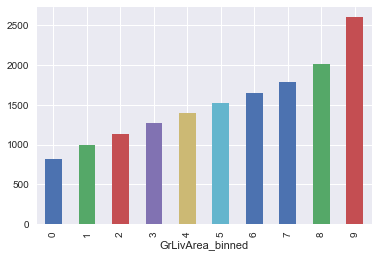

In [13]:
# we see that the mean value of the variable increases with the bin number
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

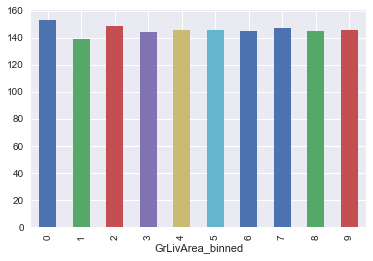

In [14]:
# in  equal frequency discretisation, we tend to have the same amount of observations
# in each one of the bins.
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()

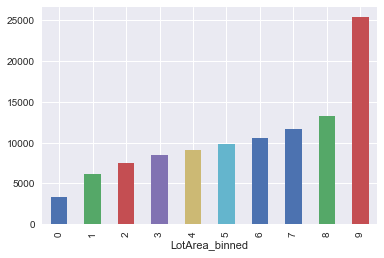

In [15]:
# here I put side by side the original variable and the transformed variable
tmp = pd.concat([data['LotArea'], data_tf['LotArea']], axis=1)
tmp.columns = ['LotArea', 'LotArea_binned']

# we see that the mean value of the variable increases with the bin number
tmp.groupby('LotArea_binned')['LotArea'].mean().plot.bar()

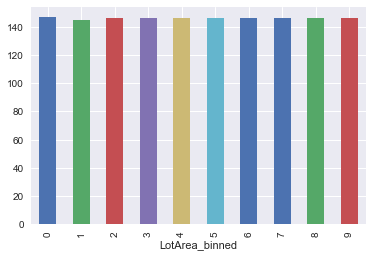

In [16]:
# in  equal frequency discretisation, we tend to have the same amount of observations
# in each one of the bins.

tmp.groupby('LotArea_binned')['LotArea'].count().plot.bar()

## EqualWidthDiscretiser

In [17]:
data = load_houseprice()

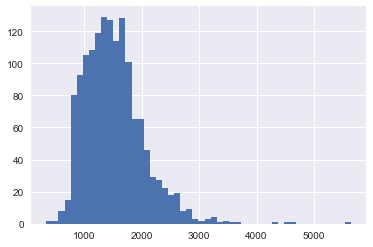

In [18]:
data['GrLivArea'].hist(bins=50)

In [19]:
ewd = dsc.EqualWidthDiscretiser(bins=10, variables = ['LotArea', 'GrLivArea'])
ewd.fit(data)

EqualWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'])

In [20]:
# binner_dict contains the boundaries of the bins
ewd.binner_dict

{'GrLivArea': [-inf,
  864.79999999999995,
  1395.5999999999999,
  1926.3999999999999,
  2457.1999999999998,
  2988.0,
  3518.7999999999997,
  4049.5999999999995,
  4580.3999999999996,
  5111.1999999999998,
  inf],
 'LotArea': [-inf,
  22694.5,
  44089.0,
  65483.5,
  86878.0,
  108272.5,
  129667.0,
  151061.5,
  172456.0,
  193850.5,
  inf]}

In [21]:
data_tf = ewd.transform(data)

In [22]:
# the below are the bins into which the observations were sorted
data_tf['GrLivArea'].unique()

array([2, 1, 3, 0, 4, 5, 6, 8, 7, 9], dtype=int64)

In [23]:
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,2
1,1262,1
2,1786,2
3,1717,2
4,2198,3


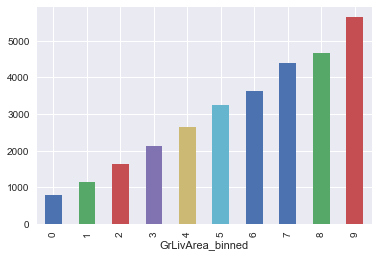

In [24]:
# the value of the variable increases with the bin number
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

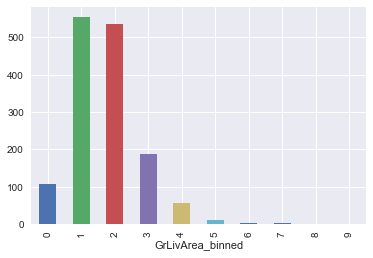

In [25]:
# in the equal width discretisers, each bucket / bin does not necessarily contain
# the same number of observations.
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()

## DecisionTreeDiscretiser

In [26]:
data = load_houseprice()

In [27]:
treeDisc = dsc.DecisionTreeDiscretiser(cv = 3, scoring='neg_mean_squared_error',
                                        variables = ['LotArea', 'GrLivArea'],
                                       regression=True)

treeDisc.fit(data, data.SalePrice)

DecisionTreeDiscretiser(cv=3, regression=True,
            scoring='neg_mean_squared_error',
            variables=['LotArea', 'GrLivArea'])

In [28]:
# the binner contains the best decision tree for each variable
treeDisc.binner_dict

{'GrLivArea': DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
 'LotArea': DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')}

In [29]:
data_tf = treeDisc.transform(data)

In [30]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 2 bins is enough
data_tf['GrLivArea'].unique()

array([ 228771.77777778,  137687.22816167])

In [31]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 2 bins is enough
data_tf['LotArea'].unique()

array([ 158705.40298507,  229991.24395604])

In [32]:
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,228771.777778
1,1262,137687.228162
2,1786,228771.777778
3,1717,228771.777778
4,2198,228771.777778


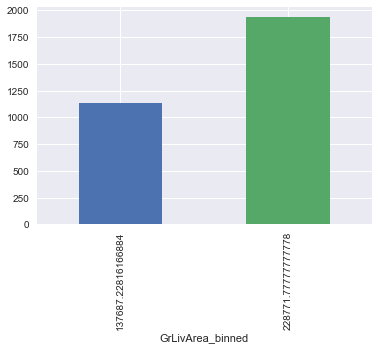

In [33]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

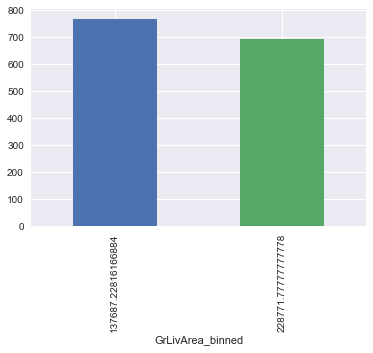

In [34]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()

### Decision tree discretiser for classfication

In [35]:
# function to load the titanic dataset, and get the first letter of the variable cabin
# we will load the dataset multiple times during the demo

def load_titanic():
    data = pd.read_csv('titanic.csv')
    data['Cabin'] = data['Cabin'].astype(str).str[0]
    data['Pclass'] = data['Pclass'].astype('O')
    data['Embarked'].fillna('C', inplace=True)
    return data

In [36]:
# load data
data = load_titanic()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


In [37]:
treeDisc = dsc.DecisionTreeDiscretiser(cv = 3, scoring='roc_auc',
                                        variables = ['Fare', 'Age'],
                                       regression=False)

treeDisc.fit(data.fillna(0), data.Survived)

DecisionTreeDiscretiser(cv=3, regression=False, scoring='roc_auc',
            variables=['Fare', 'Age'])

In [38]:
treeDisc.binner_dict

{'Age': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 'Fare': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best')}

In [39]:
data_tf = treeDisc.transform(data.fillna(0))

In [40]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 6 bins is enough
data_tf['Age'].unique()

array([ 0.38957055,  0.29378531,  0.47058824,  0.7826087 ,  0.        ,  1.        ])

In [41]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 8 bins is enough
data_tf['Fare'].unique()

array([ 0.26811594,  0.25      ,  0.19827586,  0.75675676,  0.42431762,
        0.76666667,  1.        ,  0.02564103,  0.        ,  0.5       ,
        0.03846154])

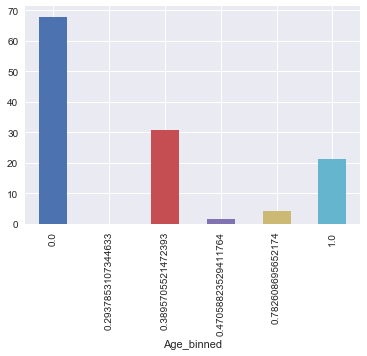

In [42]:
tmp = pd.concat([data['Age'].fillna(0), data_tf['Age']], axis=1)
tmp.columns = ['Age', 'Age_binned']

tmp.groupby('Age_binned')['Age'].mean().plot.bar()

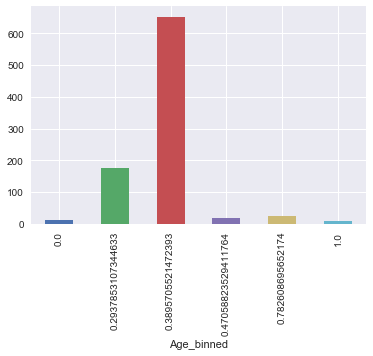

In [43]:
tmp.groupby('Age_binned')['Age'].count().plot.bar()

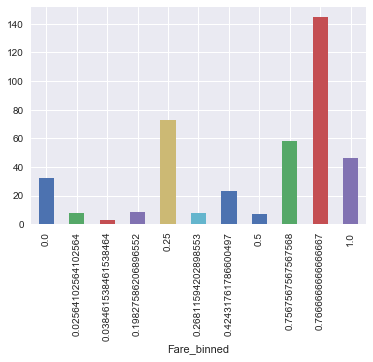

In [44]:
tmp = pd.concat([data['Fare'].fillna(0), data_tf['Fare']], axis=1)
tmp.columns = ['Fare', 'Fare_binned']

tmp.groupby('Fare_binned')['Fare'].mean().plot.bar()

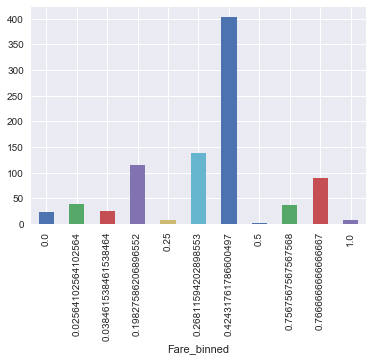

In [45]:
tmp.groupby('Fare_binned')['Fare'].count().plot.bar()

### 6.6.7. Outlier remover

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

from feature_engine import missing_data_imputers  as msi
from feature_engine import outlier_removers as outr

In [2]:
# function to load the titanic dataset, and get the first letter of the variable cabin
# we will load the dataset multiple times during the demo

def load_titanic():
    data = pd.read_csv('titanic.csv')
    data['Cabin'] = data['Cabin'].astype(str).str[0]
    data['Pclass'] = data['Pclass'].astype('O')
    data['Embarked'].fillna('C', inplace=True)
    return data

In [3]:
data = load_titanic()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


## Windsorizer

Windzorizer finds maximum and minimum values following a Gaussian or skewed distribution as indicated. It can also cap the right, left or both ends of the distribution.

In [4]:
# let's find out the maximum Age and maximum Fare in the titanic
data.Age.max(), data.Fare.max()

(80.0, 512.32920000000001)

### Gaussian distribution and right tail

In [5]:
windsoriser = outr.Windsorizer(distribution='gaussian', tail='right', fold=3, variables = ['Age','Fare'])
windsoriser.fit(data)

Windsorizer(distribution='gaussian', fold=3, tail='right',
      variables=['Age', 'Fare'])

In [6]:
# here we can find the maximum caps allowed
windsoriser.right_tail_caps_

{'Age': 73.27860964406095, 'Fare': 181.2844937601173}

In [7]:
# this dictionary is empty, because we selected only right tail
windsoriser.left_tail_caps_

{}

In [8]:
data = windsoriser.transform(data)

# let's check the new maximum Age and maximum Fare in the titanic
data.Age.max(), data.Fare.max()

(73.27860964406095, 181.2844937601173)

### Gaussian distribution, both tails

In [9]:
data = load_titanic()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


In [10]:
windsoriser = outr.Windsorizer(distribution='gaussian', tail='both', fold=1, variables='Fare')
windsoriser.fit(data)

Windsorizer(distribution='gaussian', fold=1, tail='both', variables=['Fare'])

In [11]:
windsoriser.left_tail_caps_

{'Fare': -17.489220628606304}

In [12]:
windsoriser.right_tail_caps_

{'Fare': 81.8976365657555}

In [13]:
temp = windsoriser.transform(data) # need to add a catcher for the transform
temp.Fare.max()

81.897636565755505

### Skewed distribution, left tail

In [14]:
data = load_titanic()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


In [15]:
windsoriser = outr.Windsorizer(distribution='skewed', tail='left', fold=1, variables = ['Age', 'Fare'])
windsoriser.fit(data)

Windsorizer(distribution='skewed', fold=1, tail='left',
      variables=['Age', 'Fare'])

In [16]:
# right tail dictionary is empty, because we selected only left tail
windsoriser.right_tail_caps_

{}

In [17]:
windsoriser.left_tail_caps_

{'Age': 2.25, 'Fare': -15.179200000000002}

In [18]:
temp = windsoriser.transform(data)
temp.Age.min(), temp.Fare.min()

(2.25, 0.0)

## ArbitraryOutlierCapper

The ArbitraryOutlierCapper caps the minimum and maximum values by a value determined by the user. 

In [19]:
data = load_titanic()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


In [20]:
# let's find out the maximum Age and maximum Fare in the titanic
data.Age.max(), data.Fare.max()

(80.0, 512.32920000000001)

In [21]:
capper = outr.ArbitraryOutlierCapper(max_capping_dict = {'Age':50, 'Fare':200}, min_capping_dict = None)
capper.fit(data)

ArbitraryOutlierCapper(max_capping_dict={'Fare': 200, 'Age': 50},
            min_capping_dict=None)

In [22]:
capper.right_tail_caps_

{'Age': 50, 'Fare': 200}

In [23]:
capper.left_tail_caps_

{}

In [24]:
temp = capper.transform(data)
temp.Age.max(), temp.Fare.max()

(50.0, 200.0)

### Minimum capping

In [25]:
capper = outr.ArbitraryOutlierCapper(max_capping_dict = None, min_capping_dict = {'Age':10, 'Fare':100})
capper.fit(data)

ArbitraryOutlierCapper(max_capping_dict=None,
            min_capping_dict={'Fare': 100, 'Age': 10})

In [26]:
capper.variables

['Fare', 'Age']

In [27]:
capper.right_tail_caps_

{}

In [28]:
temp = capper.transform(data)
temp.Age.min(), temp.Fare.min()

(10.0, 100.0)

### Both ends capping

In [29]:
capper = outr.ArbitraryOutlierCapper(max_capping_dict = {'Age':50, 'Fare':200}, min_capping_dict = {'Age':10, 'Fare':100})
capper.fit(data)

ArbitraryOutlierCapper(max_capping_dict={'Fare': 200, 'Age': 50},
            min_capping_dict={'Fare': 100, 'Age': 10})

In [30]:
capper.right_tail_caps_

{'Age': 50, 'Fare': 200}

In [31]:
capper.left_tail_caps_

{'Age': 10, 'Fare': 100}

In [32]:
temp = capper.transform(data)
temp.Age.min(), temp.Fare.min()

(10.0, 100.0)

In [33]:
temp.Age.max(), temp.Fare.max()

(50.0, 200.0)

# 5. Outlier

## 6.6. Outliers

An outlier is a data point which is significantly different from the remaining data. "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

## Outliers

An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

Statistics such as the mean and variance are very susceptible to outliers. In addition, **some Machine Learning models are indeed sensitive to outliers and their performance might be impaired by them**. Thus, it is common practice to engineer the features to minimise the impact of outliers on the performance of these algorithms.


### Nature of outliers

- Genuine extremely high or extremely low values
- Introduced due to mechanical error (wrong measurement)
- Introduced by replacing missing values (NA) by a value out of the distribution (as described in previous lectures)

In some cases, the presence of outliers is informative, and therefore they deserve further study. In this course I will tackle the engineering of those values that do not add any particular extra information, and could as well be eliminated.  

## How can we pre-process outliers?

- Mean/median imputation or random sampling
- Discrestisation
- Discard the outliers: process also called Trimming
- Top-coding, bottom-coding and zero-coding: also known as windsorization


### Mean/median imputation or random sampling

If we have reasons to believe that the outliers are due to mechanical error or problems during measurement. This means, if the outliers are in nature similar to missing data, then any of the methods discussed for missing data can be applied to replace outliers. Because the number of outliers is in nature small (otherwise they would not be outliers), it is reasonable to use the mean/median imputation to replace them.

### Discretisation

Discretisation is the transformation of continuous variables into discrete variables. It involves assigning the variable values into defined groups. For example, for the variable age, we could group the observations (people) into buckets / groups like: 0-20, 21-40, 41-60, > 61. This grouping of the variables in ranges is called discretisation. As you can see, any outlier (extremely high) value of age would be included in the > 61 group, therefore minimising its impact. I will discuss more on the different discretisation methods in the "Discretisation" section of this course.

### Trimming

Trimming refers to the removal of the extreme values of a sample. In this procedure, the outliers are identified and those observations removed from the sample. On the down side, these values, may contain useful information for other variables included in the dataset. Thus, likely, we may choose not to remove these observations and handle outliers by top / bottom coding as described below.


## Top-coding, bottom-coding and zero-coding.

**Top-conding**, widely used in econometrics and statistics, means capping the maximum of a distribution at an arbitrarily set value. A top-coded variable is one for which data points whose values are above an upper bound are censored. This means in practical terms that all values above the upper band will be arbitrarily set to the upper band.

Top-coding is common practice in survey data, before it is released to the public. It is used to preserve the anonymity of respondents. For example, high earners may be easily identifiable by their earnings. Thus, by implementing top-coding, that outlier is capped at a certain maximum value and therefore looks like many other observations, it is not uniquely identifiable any more. Top-coding can be also applied to prevent possibly-erroneous outliers from being published.

Bottom-coding is analogous, but on the left side of the distribution. This is, all values below a certain threshold, are capped at that threshold. If the threshold is zero, then it is known as **zero-coding**, e.g. if amounts below zero are reported as zero. Good examples would be the variable "age", or the variable "earnings". It is not possible to have negative age or a negative salary, thus, it is reasonable to cap the lowest values at zero. Any observation with a value under zero must have been introduced by mistake.

Top-coding and bottom-coding are indeed used in practice to remove outliers of variables and therefore prevent model over-fitting. For an example in a financial institution, look at my talk in [pydata](https://www.google.co.uk/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&cad=rja&uact=8&ved=0ahUKEwiEtaG7p6fXAhVI2hoKHWqQBsMQtwIILTAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DKHGGlozsRtA&usg=AOvVaw13tQ7UEv3w1k_RLsEbB3aB).

#### Note

Top-coding may affect estimates of the standard errors of the variable, or change the variable distribution, by censoring those values at the far end of the tails.


### Should outliers be removed?

Depending on the context, outliers either deserve special attention or should be completely ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card is usually a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and investigate further outlier values.

If outliers are however, introduced due to mechanical error, measurement error or anything else that can't be generalised, it is a good idea to remove these outliers before feeding the data to the modeling algorithm. Why? Because some algorithms are sensitive to outliers. 


### Which machine learning models are sensitive to outliers?

Some machine learning models are more sensitive to outliers than others. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.

Linear models, in particular Linear Regression, can be also sensitive to outliers.

Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= a certain value, and therefore the outlier will fall on each side of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

A recent research article suggests that Neural Networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (>15% as suggested in the article), then they are no longer outliers, and rather a fair representation of that variable. A link to this article can be found in the "Additional reading resources" lecture within this section of the course.


### How can outliers be identified?

Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations. These are mostly targeted to identify outliers when those are the observations that we indeed want to focus on, for example for fraudulent credit card activity.

In this course, however, I will focus on identifying those outliers introduced by mechanical or measurement error. Those outliers that are indeed a rare case in the population, and that could be ignored. I will show how to identify those outliers, so that in later sections of the course, we can learn how to pre-process them before using the variable to train machine learning algorithms.


### Extreme Value Analysis

The most basic form of outlier detection is **Extreme Value Analysis** of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then find the values that sit at the very end of the tails.

If the the variable is Normally distributed (Gaussian), then the values that lie outside the mean plus or minus 3 times the standard deviation of the variable are considered outliers.

- outliers = mean +/- 3* std


If the variable is skewed distributed, a general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows:

- IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)


### 6.6.1. Outliers detection

#### Outlier detection for Normally distributed vars

In [140]:
# function to find upper and lower boundaries
# for normally distributed variables


def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [141]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(df4, 'RM')
upper_boundary, lower_boundary

(8.392485817597757, 4.176782957105816)

From the above we conclude that values bigger than 8.4 or smaller than 4.2 occur very rarely for the variable RM. Therefore, we can consider them outliers.

In [142]:
# inspect the number and percentage of outliers for RM

print('total number of houses: {}'.format(len(df4)))

print('houses with more than 8.4 rooms (right end outliers): {}'.format(
    len(df4[df4['RM'] > upper_boundary])))

print('houses with less than 4.2 rooms (left end outliers: {}'.format(
    len(df4[df4['RM'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df4[df4['RM'] > upper_boundary]) / len(df4)))

print('% left end outliers: {}'.format(
    len(df4[df4['RM'] < lower_boundary]) / len(df4)))

total number of houses: 506
houses with more than 8.4 rooms (right end outliers): 4
houses with less than 4.2 rooms (left end outliers: 4

% right end outliers: 0.007905138339920948
% left end outliers: 0.007905138339920948


Using Extreme Value Analysis we identified outliers at both ends of the distribution of RM. The percentage of outliers is small (1.4% considering the 2 tails together), which makes sense, because we are finding precisely outliers. That is, rare values, rare occurrences.

Let's move on to Age in the titanic dataset.

In [143]:
# calculate boundaries for Age in the titanic

upper_boundary, lower_boundary = find_normal_boundaries(df2, 'Age')
upper_boundary, lower_boundary

(73.27860964406095, -13.88037434994331)

The upper boundary is 73 years, which means that passengers older than 73 were very few, if any, in the titanic. The lower boundary is negative. Because negative age does not exist, it only makes sense to look for outliers utilising the upper boundary.

In [144]:
# lets look at the number and percentage of outliers

print('total passengers: {}'.format(len(df2)))

print('passengers older than 73 rooms: {}'.format(
    len(df2[df2['Age'] > upper_boundary])))
print()
print('% of passengers older than 73 rooms: {}'.format(
    len(df2[df2['Age'] > upper_boundary]) / len(df2)))

total passengers: 891
passengers older than 73 rooms: 2

% of passengers older than 73 rooms: 0.002244668911335578


There were 2 passengers older than 73 on board of the titanic, which could be considered outliers, as the majority of the population where much younger.

#### Outlier detection for Skewed vars

In [142]:
# function to find upper and lower boundaries
# for skewed distributed variables


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [146]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df4, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [147]:
# lets look at the number and percentage of outliers
# for LSTAT

print('total houses: {}'.format(len(df4)))

print('houses with LSTAT bigger than 32: {}'.format(
    len(df4[df4['LSTAT'] > upper_boundary])))
print()
print('% houses with LSTAT bigger than 32: {}'.format(
    len(df4[df4['LSTAT'] > upper_boundary])/len(df4)))

total houses: 506
houses with LSTAT bigger than 32: 7

% houses with LSTAT bigger than 32: 0.01383399209486166


The upper boundary shows a value of ~32. The lower boundary is negative, however the variable LSTAT does not take negative values. So to calculate the outliers for LSTAT we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of LSTAT's distribution.

We observe 7 houses, 1.3 % of the dataset, with extremely high values for LSTAT.

In [148]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 3, now I am looking for extremely high values

upper_boundary, lower_boundary = find_skewed_boundaries(df4, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [149]:
# lets look at the number and percentage of outliers
# for CRIM

print('total houses: {}'.format(len(df4)))

print('houses with CRIM bigger than 14: {}'.format(
    len(df4[df4['CRIM'] > upper_boundary])))
print()
print('% houses with CRIM bigger than 14s: {}'.format(
    len(df4[df4['CRIM'] > upper_boundary]) / len(df4)))

total houses: 506
houses with CRIM bigger than 14: 30

% houses with CRIM bigger than 14s: 0.05928853754940711


When using the 3  times inter-quantile range to find outliers, we find that ~6% of the houses show unusually high crime rate areas. For CRIM as well, the lower boundary is negative, so it only makes sense to use the upper boundary to calculate outliers, as the variable takes only positive values. This coincides with what we observed in CRIM's boxplot earlier in this notebook.

In [150]:
# finally, identify outliers in Fare in the
# titanic dataset. I will look again for extreme values
# using IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(df2, 'Fare', 3)
upper_boundary, lower_boundary

(100.2688, -61.358399999999996)

In [151]:
# lets look at the number and percentage of passengers
# who paid extremely high Fares

print('total passengers: {}'.format(len(df2)))

print('passengers older than 73 rooms: {}'.format(
    len(df2[df2['Fare'] > upper_boundary])))
print()
print('passengers older than 73 rooms: {}'.format(
    len(df2[df2['Fare'] > upper_boundary])/len(df2)))

total passengers: 891
passengers older than 73 rooms: 53

passengers older than 73 rooms: 0.05948372615039282


For Fare, as well as for all the other variables in this notebook which show a tail to the right, the lower boundary is negative. So we will use the upper boundary to determine the outliers. We observe that 6% of the values of the dataset fall above the boundary. 

### 6.6.2. Top coding, bottomg coding and zero coding

### Top-coding important

Top-coding and bottom-coding, as any other feature pre-processing step, should be determined over the training set, and then transferred onto the test set. This means that we should find the upper and lower bounds in the training set only, and use those bands to cap  the values in the test set.

In [9]:
# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(df2, df2.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

There are 2 numerical variables in this dataset, Fare and Age. So let's go ahead and find out whether there are values that we could consider outliers

### Fare

Text(0, 0.5, 'Number of Passengers')

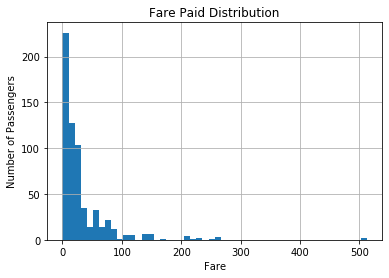

In [10]:
# First let's plot a histogram to get an idea of the distribution

fig = X_train.Fare.hist(bins=50)
fig.set_title('Fare Paid Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

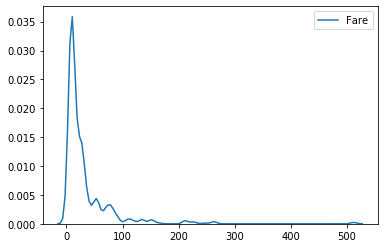

In [11]:
sns.kdeplot(X_train.Fare)

Because the distribution of Fare is skewed, we should estimate outliers using the quantile method instead of the Gaussian distribution.

Text(0, 0.5, 'Number of Passengers')

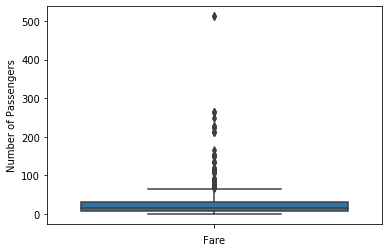

In [12]:
# visualising outliers using boxplots and whiskers, which provides the quantiles
# and inter-quantile range, with the outliers sitting outside the error bars.
# All the dots in the plot below are outliers according to the 1.5 IQR rule

fig = sns.boxplot(y='Fare', data=X_train)
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

The outliers, according to the above plot, lie all at the right side of the distribution. This is, some people paid extremely high prices for their tickets. 

Therefore, in this variable, only extremely high values will affect the performance of our machine learning models, and we need to do therefore top-coding. Bottom coding in this case it is not necessary. At least not to improve the performance of the machine learning algorithms.

In [13]:
# let's look at the values of the quantiles so we can calculate the upper and lower boundaries for the outliers

X_train.Fare.describe()

count   623.0000
mean     32.4583
std      48.2577
min       0.0000
25%       7.9250
50%      15.0000
75%      31.3875
max     512.3292
Name: Fare, dtype: float64

In [16]:
# top coding: upper boundary for outliers according to interquantile proximity rule

IQR = df2.Fare.quantile(0.75) - df2.Fare.quantile(0.25)

Upper_fence = X_train.Fare.quantile(0.75) + (IQR * 3)

Upper_fence

100.6563

The upper boundary, above which every value is considered an outlier is a cost of 100 dollars for the Fare.

In [9]:
# lets look at the actual number of passengers that paid more than USS 100
print('total passengers: {}'.format(X_train.shape[0]))
print('passengers that paid more than 100: {}'.format(X_train[X_train.Fare>100].shape[0]))
print('percentage of outliers: {}'.format(X_train[X_train.Fare>100].shape[0]/np.float(X_train.shape[0])))

total passengers: 623
passengers that paid more than 100: 36
percentage of outliers: 0.05778491171749599


In [10]:
# top-coding: capping the variable Fare at 100
X_train.loc[X_train.Fare>100, 'Fare'] = 100
X_test.loc[X_test.Fare>100, 'Fare'] = 100
X_train.Fare.max(), X_test.Fare.max()

C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(100.0, 100.0)

This is all we need to remove outliers from a machine learning perspective.

However, note that in the dataset, there are also a few passengers that paid zero for their tickets

In [11]:
X_train[X_train.Fare==0].shape

(7, 12)

In [12]:
X_train[X_train.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


The majority of them do not have a Cabin assigned, and could therefore have jumped on the boat illegally. Alternatively, there could also be that that information could not be retrieved, so we do not know how much they paid. But we do know that the cheapest ticket was 5 dollars, see below:

In [13]:
X_train[X_train.Fare!=0]['Fare'].min()

5.0

In situations like this, it is best to discuss with the data owner (in business, someone who knows the data well) the nature of the data, and the importance of the variable.

If the 0 values in this case mean that the data could not be retrieved properly, and therefore is in nature an NaN, one could choose to replace them by a random sample or mean/median imputation, or to do bottom-coding.

If the case of zero corresponds otherwise to people jumping on the boat illegally, one may choose to leave them as zero.

### Age

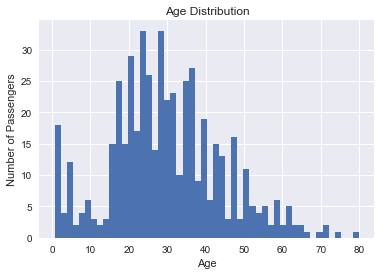

In [14]:
# First let's plot the histogram to get an idea of the distribution

fig = X_train.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

C:\Users\Sole\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Sole\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


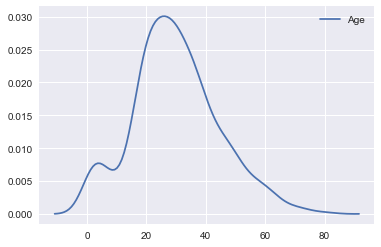

In [15]:
sns.kdeplot(X_train.Age)

Although it does not look strictly normal, we could assume normality and use the Gaussian approach to find outliers. See below.

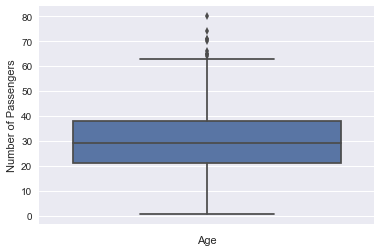

In [16]:
# now let's plot the boxplots and whiskers

fig = sns.boxplot(y='Age', data=X_train)
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Again, for this variable the outliers lie only on the right of the distribution. Therefore we only need to introduce top-coding.

In [17]:
# and let's get the numbers to calculate the upper boundary
X_train.Age.describe()

count    502.000000
mean      29.915339
std       14.506994
min        0.670000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
# Assuming normality

Upper_boundary = X_train.Age.mean() + 3* X_train.Age.std()
Upper_boundary

73.43632005918366

In [19]:
# let's find out whether there are outliers according to the above boundaries
# remember that Age has ~ 20% missing values

total_passengers = np.float(X_train.shape[0])
print('total passengers: {}'.format(X_train.Age.dropna().shape[0]/total_passengers))
print('passengers older than 73 (Gaussian app): {}'.format(X_train[X_train.Age>73].shape[0]/total_passengers))

total passengers: 0.8057784911717496
passengers older than 73 (Gaussian app): 0.0032102728731942215


In [20]:
X_train.loc[X_train.Age>73, 'Age'] = 73
X_test.loc[X_test.Age>73, 'Age'] = 73

X_train.Age.max(), X_test.Age.max()

C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(73.0, 70.5)

In the test set, there were no outliers, as the maximum Age value is 70, below the value we used to cap outliers.

## Loan book from Lending Club

In [21]:
# we will examine only the income variable, as this is one that typically shows outliers.
# a few people are high earners, and the remaining of the borrowers fall within a normal-ish distribution

data = pd.read_csv('loan.csv', usecols=['annual_inc'], nrows=30000)
data.head()

,annual_inc
0,24000.0
1,30000.0
2,12252.0
3,49200.0
4,80000.0


(0, 500000)

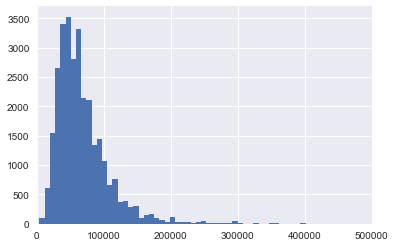

In [22]:
fig = data.annual_inc.hist(bins=500)
fig.set_xlim(0,500000)

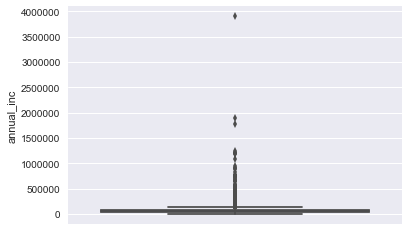

In [23]:
sns.boxplot(y='annual_inc', data=data)

As expected, outliers sit on the right of the distribution. Therefore, we will perform top-coding.

In [24]:
data.annual_inc.describe()

count    3.000000e+04
mean     6.913686e+04
std      5.528003e+04
min      4.080000e+03
25%      4.152720e+04
50%      6.000000e+04
75%      8.319997e+04
max      3.900000e+06
Name: annual_inc, dtype: float64

In [25]:
# because the distribution is not completely normal, I choose to examine outliers with the interquantal
# distance

IQR = data.annual_inc.quantile(0.75) - data.annual_inc.quantile(0.25)

Upper_fence = data.annual_inc.quantile(0.75) + (IQR * 1.5)
Upper_fence_ext = data.annual_inc.quantile(0.75) + (IQR * 3)

Upper_fence, Upper_fence_ext

(145709.125, 208218.28000000003)

In [26]:
# let's look at the percentage of high earners within each extreme bucket

total_borrowers = np.float(data.shape[0])
print('total borrowers: {}'.format(data.annual_inc.shape[0]/total_borrowers))
print('borrowers than earn > 146k: {}'.format(data[data.annual_inc>146000].shape[0]/total_borrowers))
print('borrowers than earn > 210k: {}'.format(data[data.annual_inc>210000].shape[0]/total_borrowers))

total borrowers: 1.0
borrowers than earn > 146k: 0.04593333333333333
borrowers than earn > 210k: 0.012133333333333333


In [27]:
# top-coding
data['annual_capped'] = np.where(data.annual_inc>210000, 210000, data.annual_inc)

data.describe()

,annual_inc,annual_capped
count,3.000000e+04,30000.000000
mean,6.913686e+04,67439.817264
std,5.528003e+04,37537.869513
min,4.080000e+03,4080.000000
25%,4.152720e+04,41527.200000
50%,6.000000e+04,60000.000000
75%,8.319997e+04,83199.970000
max,3.900000e+06,210000.000000


We see the effect of capping on the overall distribution of the variable. The standard deviation is smaller, and so is the maximum value.

(0, 500000)

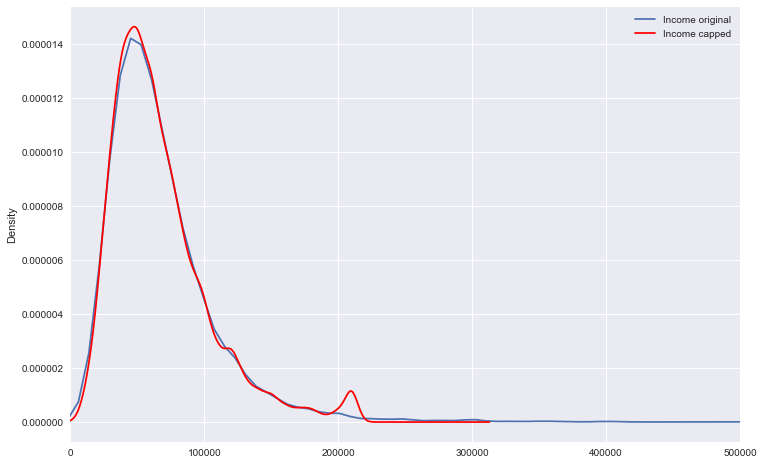

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
data.annual_inc.plot(kind='kde', ax=ax)
data.annual_capped.plot(kind='kde', ax=ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Income original', 'Income capped']
ax.legend(lines, labels, loc='best')
ax.set_xlim(0,500000)

We can observe the effect of top codding on the variable distribution. The maximum value corresponds now to the value we set as a cap. And we observe a peak in that value, that indicates that people that earn more than the cap, are now grouped together under a capped maximum salary.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

#### Mileage

In [10]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.reset_index(drop=True,inplace=True)

# 6. Categorical Vars

### 6.5.1. Quantify cardinality

#### List all categorical vars

In [84]:
cat_vars = [var for var in df2.columns if df2[var].dtypes == 'O' if var not in ['Survived']]
print("\nCategorical vars: ", cat_vars)


Categorical vars:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


#### Count unique values of each categorical variables

In [85]:
cat_feature_df = pd.DataFrame(columns=['Feature','count_distinct_value'])
for e in cat_vars:
    count_distinct = len(df2[e].unique())
    cat_feature_df = cat_feature_df.append({'Feature':e,'count_distinct_value':count_distinct},ignore_index=True)
    
cat_feature_df.sort_values('count_distinct_value',ascending = False)

,Feature,count_distinct_value
0,Name,891
2,Ticket,681
3,Cabin,148
4,Embarked,4
1,Sex,2


While the variable Sex contains only 2 categories and Embarked 4 (low cardinality), the variables Ticket, Name and Cabin, as expected, contain a huge number of different labels (high cardinality).

#### Check unique values for each categorical vars

In [68]:
# only consider categorical vars with num of unique values less than or equal to 20
selected_list = cat_feature_df[cat_feature_df['count_distinct_value'] < 15].Feature.values

def analyse_frequency_labels(df, var):
    df = df.copy()
    tmp = df[var].value_counts() / len(df)
    return tmp

for var in selected_list:
    print(analyse_frequency_labels(df2, var))
    print()

male     0.6476
female   0.3524
Name: Sex, dtype: float64

S   0.7228
C   0.1886
Q   0.0864
Name: Embarked, dtype: float64



#### Standardize labels

In [613]:
# let's explore the ticket categorical part a bit further
df.Ticket_categorical.unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [614]:
# it contains several labels, some of them seem very similar apart from the punctuation
# I will try to reduce this number of labels a bit further

# remove non letter characters from string
text = df.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))

# to visualise the output and compare with input
pd.concat([text, df.Ticket_categorical], axis=1)

,Ticket_categorical,Ticket_categorical
0,A,A/5
1,PC,PC
2,STONO,STON/O2.
3,nan,NaN
4,nan,NaN
...,...,...
886,nan,NaN
887,nan,NaN
888,WC,W./C.
889,nan,NaN


In [615]:
# set to upper case: we reduce the number of labels quite a bit
text = text.str.upper()
text.unique()

array(['A', 'PC', 'STONO', 'NAN', 'PP', 'CA', 'SCPARIS', 'SCA', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'SOTONO',
       'CASOTON'], dtype=object)

In [616]:
# process the variable in submission as well
df['Ticket_categorical'] = text

In [617]:
# drop the original variable
df.drop(labels='Ticket', inplace=True, axis=1)

### 6.5.2. Identify rare labels

## 3.2. Engineering Rare Labels / Rare Categories

### Overview

Rare values are labels/ categories within a categorical variable that are only present for a small percentage of the observations.

There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5% may cause over-fitting in trees.

Rare labels may exist in variables that have intrinsically a huge number of labels, or they can be present in variables with few labels (e.g., 2-10). There is no rule of thumb to determine how many different labels is big (and therefore represent high cardinality) and it will depend as well on how many observations there are in the dataset. In a dataset with 1,000 observations, 100 labels may seem a lot, whereas in a dataset with 100,000 observations it may not be so high.

In situations where rare labels are present in variables with only a few categories, the rare label may be adding some information. On the other hand, in variables with a high number of categories, likely there will be very many labels with a low frequency, which will quite likely add noise instead of information. 

Whether rare labels should be processed before training a machine learning algorithm will depend on the dataset and problem at hand. Ideally, if there are not too many variables, you could try and explore the variables and their categories one at a time, and determine whether the rare labels add noise or information.

If, on the other hand, the dataset has very many categorical variables, and exploring one at a time is not an option you may choose to sacrifice the ideal / optimal performance for a higher delivery speed.

### Engineering rare labels

There are multiple ways of accounting for rare labels. Some of them handle rare labels at the same time of converting labels into numbers. I will explain those in the section "Engineer labels of categorical variables".

In this section of the course, I will expand on how to **handle rare labels by re-categorising the observation that show rare labels for a certain variable**. These observations can be re-categorised by:

- Replacing the rare label by most frequent label
- Grouping the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')

In this and the coming lectures I will explain when it is convenient to use one or the other way of replacing rare values, and evaluate the consequences of replacing rare labels in variables with:

- One predominant category
- A small number of categories
- High cardinality

**Note that grouping infrequent labels or categories under a new category called 'Rare' or 'Other' is the most common practice in machine learning for businesses.**

Specifically, in this lecture I will demonstrate how to work with rare labels in variables with one predominant category using the House Sale dataset from Kaggle.

### Rare value imputation - important

The identification of rare labels should be done considering only the presence of rare labels in the training set, and then propagated to the test set. This means, rare labels should be identified in the training set. And then, when those are present in the test set as well, they should be replaced, regardless of whether in the test set they are rare or not (i.e., regardless of whether in the test set they are also present in a tiny percentage of the observations or in a high percentage of observations)

In addition, there may be in the test set labels that were not present in the train set. They should be considered rare and preprocessed using the method that was selected to replace rare labels in the training set.

For example, let's imagine that we have in the training set the variable 'city' with the labels 'London', 'Manchester' and 'Yorkshire'. 'Yorkshire' is present in less than 5% of the observations so we decide to replace it by 'London', the most frequent city in the training dataset. In the test set, we should also replace 'Yorkshire' by 'London', regardless of the percentage of observations for 'Yorkshire' or whether 'London' is still the most represented city in the test set.

In addition, if in the test set we find the category 'Milton Keynes', that was not present in the training set, we should also replace that category by London. This is, all categories present in test set, not present in training set, should be treated as rare values and imputed accordingly.

### Different categorical variable scenarios

Categorical variables may present themselves in a wide variety of different scenarios. Among these, we find variables with:

- One dominating category (most of the observations share the same label)
- A few categories
- High cardinality (a lot of different categories).

### House price dataset

Below I will write a few functions to convert categories in categorical variables into numbers so we can use them in sklearn and then to quickly test these variables in a random forest.

#### Split dataset into train set and test set

In [28]:
# let's go ahead and divide dataset into train and test set
df3 = org_df3.copy()
X_train, X_test, y_train, y_test = train_test_split(df3, df3.SalePrice,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 81), (438, 81))

#### Training model

In [29]:
def train_rf(X_train, y_train, X_test, y_test, columns):
    # function to train the random forest
    # and test it on train and test sets
    
    rf = RandomForestRegressor(n_estimators=800, random_state=39)
    
    if type(columns)==str: # if we train using only 1 variable (pass a string instead of list in the "columns" argument of the function)
        rf.fit(X_train[columns].to_frame(), y_train.values)
        pred_train = rf.predict(X_train[columns].to_frame())
        pred_test = rf.predict(X_test[columns].to_frame())
        
    else: # if we train using multiple variables (pass a list in the argument "columns")
        rf.fit(X_train[columns], y_train.values)
        pred_train = rf.predict(X_train[columns])
        pred_test = rf.predict(X_test[columns])
        
    print('Train set')
    print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
    print('Test set')
    print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

#### Convert categories to numbers

In [30]:
def labels_to_numbers(X_train, X_test, columns):
    # function to encode labels into numbers
    # each label will be assigned an ordinal number from 0 onwards
    
    for col in columns:
        labels_dict = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
        X_train.loc[:, col] = X_train.loc[:, col].map(labels_dict )
        X_test.loc[:, col] = X_test.loc[:, col].map(labels_dict)

In [31]:
labels_dict = {k:i for i, k in enumerate(X_train['Street'].unique(), 0)}
labels_dict

{'Pave': 0, 'Grvl': 1}

#### Let's check that the functions work as desired

In [32]:
# let's inspect the content of the variable Street
X_train['Street'].head()

64      Pave
682     Pave
960     Pave
1384    Pave
1100    Pave
Name: Street, dtype: object

The variable is categorical and the values are strings representing the characteristics of the streets where the houses are located.

In [33]:
# let's inspect the distribution of observations among the different labels

print(X_train.Street.value_counts())
print()
print(X_train.Street.value_counts() / np.float(len(X_train)))

Pave    1017
Grvl       5
Name: Street, dtype: int64

Pave   0.9951
Grvl   0.0049
Name: Street, dtype: float64


In addition, there are only 2 labels in the variable, Pave and Gravel (Grvl) and the majority of the houses are located on "Paved" streets. In situations like this, we say that one category is dominating the variable. Almost the totality of the observations show the same label.

In [34]:
# let's chech that the encoding function works

labels_to_numbers(X_train, X_test, ['Street'])

In [35]:
X_train['Street'].head()

64      0
682     0
960     0
1384    0
1100    0
Name: Street, dtype: int64

In [36]:
# let's check that the random forest training function works

train_rf(X_train, y_train, X_test, y_test, ['Street'])

Train set
Random Forests mse: 6089194757.982905
Test set
Random Forests mse: 6779809835.0570965


Our functions are working appropriately. Go ahead and check the outputs more exhaustively at your own pace, make sure you understand it well.

### 3.2.1. Variables with one dominant category

In [37]:
# let's explore a few examples in which variables have only a few categories, say less than 3

for col in df3.columns:
    if df3[col].dtypes =='O': # if the variable is categorical
        if len(df3[col].unique())<3: # if the variable has less than 3 categories
            print(df3.groupby(col)[col].count()/np.float(len(df3))) # print percentage of observations per category
            print()

Street
Grvl   0.0041
Pave   0.9959
Name: Street, dtype: float64

Utilities
AllPub   0.9993
NoSeWa   0.0007
Name: Utilities, dtype: float64

CentralAir
N   0.0651
Y   0.9349
Name: CentralAir, dtype: float64



In the first 2 variables, Street and Utilities, the  variables show one dominating category which accounts for more than 99% of the observations. In the third variable, the dominating category is present in more than 90% of the observations.

In cases of variables with one dominating category, engineering the rare label is not an option. One needs to choose between whether to use that variable as it is at all or remove it from the dataset. 

These types of variables often are not useful for our predictions, and we should remove them from the set of features that we are going to use to build machine learning models. There are of course exceptions, for example in those cases in which the target is unbalanced, and therefore, the presence of the rare label is indeed informative. The rare label can also be informative in scenarios where the target is not unbalanced.

Therefore, instead of automating a feature engineering pipeline, perhaps it is better to evaluate these variables individually.

### 3.2.2. Variables with few categories

In [38]:
# the columns in the below list have only 4 different labels
# let's inspect them

cols = ['MasVnrType', 'ExterQual', 'BsmtCond']
for col in cols:
    print(df3.groupby(col)[col].count()/np.float(len(df3)))
    print()

MasVnrType
BrkCmn    0.0103
BrkFace   0.3048
None      0.5918
Stone     0.0877
Name: MasVnrType, dtype: float64

ExterQual
Ex   0.0356
Fa   0.0096
Gd   0.3342
TA   0.6205
Name: ExterQual, dtype: float64

BsmtCond
Fa   0.0308
Gd   0.0445
Po   0.0014
TA   0.8979
Name: BsmtCond, dtype: float64



The variables above have only 4 categories. And in all three cases, there is at least one category that is infrequent, this is, that is present in less than 5% of the observations.

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else. Let's look for example at the first variable MasVnrType. This variable shows only 1 rare label, BrkCmn. Thus, re-categorising it into a new label is not an option, because it will leave the variable in the same situation. Replacing of that label by the most frequent category may be done, but ideally, we should first evaluate the distribution of values (for example house prices), within the rare and frequent label. If they are similar, then it makes sense to merge the categories. If the distributions are different however, I would choose to leave the rare label as such and use the original variable without modifications.

Below I will demonstrate the effects of engineering rare labels in variables with few categories.

In [78]:
# let's check if there are missing data

X_train[cols].isnull().sum()

MasVnrType     5
ExterQual      0
BsmtCond      24
dtype: int64

Two of the variables have missing data, so let's replace by the most frequent category as we saw on previous lectures.

In [39]:
# let's create a function to replace NA by the most frequent category
# we have seen this function in previous lectures

def impute_na(df_train, df_test, variable):
    # find most frequent category
    most_frequent_category = df_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    
    # replace NA
    df_train[variable].fillna(most_frequent_category, inplace=True)
    df_test[variable].fillna(most_frequent_category, inplace=True)

In [40]:
# and now we impute the NA with the function we just created

for col in ['MasVnrType', 'BsmtCond']:
    impute_na(X_train, X_test, col)
    
X_train[cols].isnull().sum()

MasVnrType    0
ExterQual     0
BsmtCond      0
dtype: int64

#### Let's look at those rare labels

In [41]:
print(X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train)))

MasVnrType
BrkCmn    0.0098
BrkFace   0.2945
None      0.6008
Stone     0.0949
Name: MasVnrType, dtype: float64


The label BrkCmn is present in less than 1% of the observations. Since it is the only category under-represented, creating a new category called 'Rare' to group this label does not make much sense, as the new label Rare will be in essence the same as BrkCmn, and still under-represented. 

Thus, we may choose to replace the rare label by the most frequent category, in this case, 'None'.

In [42]:
# find the most frequent category, I will use this line in the below function
frequent_cat = X_train.groupby('MasVnrType')['MasVnrType'].count().sort_values().tail(1).index.values[0]
frequent_cat

'None'

In [43]:
# find the rare label, I will use this line in the below function
temp = X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train))
[x for x in temp.loc[temp<0.05].index.values]

['BrkCmn']

In [44]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(X_train, X_test, variable):
    
    # find the most frequent category
    frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
    
    # by adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

#### Variable MasVnrType

In [45]:
# impute rare labels
rare_imputation(X_train, X_test, 'MasVnrType')

# visualise the transformed dataset
X_train[['MasVnrType', 'MasVnrType_rare_imp', 'MasVnrType_freq_imp']].head(10)

,MasVnrType,MasVnrType_rare_imp,MasVnrType_freq_imp
64,BrkFace,BrkFace,BrkFace
682,None,None,None
960,None,None,None
1384,None,None,None
1100,None,None,None
416,BrkFace,BrkFace,BrkFace
1034,None,None,None
853,BrkFace,BrkFace,BrkFace
472,BrkFace,BrkFace,BrkFace
1011,None,None,None


In [46]:
# let's inspect the original variable distribution

print(X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train)))

MasVnrType
BrkCmn    0.0098
BrkFace   0.2945
None      0.6008
Stone     0.0949
Name: MasVnrType, dtype: float64


In [47]:
# and now the distribution after rare label to "rare" imputation

print(X_train.groupby('MasVnrType_rare_imp')['MasVnrType_rare_imp'].count()/np.float(len(X_train)))

MasVnrType_rare_imp
BrkFace   0.2945
None      0.6008
Rare      0.0098
Stone     0.0949
Name: MasVnrType_rare_imp, dtype: float64


We can see  that in essence, we did nothing  other that replacing the category name 'BrkCmn' by 'Rare'. This is not useful. **Re-grouping categories under a new label rare, only makes sense for those variables that containing more than 1 rare category**. 

In [48]:
# and now let's inspect the rare label to 'frequent label' imputation
print(X_train.groupby('MasVnrType_freq_imp')['MasVnrType_freq_imp'].count()/np.float(len(X_train)))

MasVnrType_freq_imp
BrkFace   0.2945
None      0.6106
Stone     0.0949
Name: MasVnrType_freq_imp, dtype: float64


The observations that originally displayed the rare label BrkCmn are grouped together with those that showed the most frequent label.

Let's examine the performance of the three variables in Random Forests

In [49]:
# first we encode the labels into numbers with the function that we wrote a few cells ago

labels_to_numbers(X_train, X_test, ['MasVnrType', 'MasVnrType_rare_imp', 'MasVnrType_freq_imp'])

# and then we build a random forest using the original distribution
train_rf(X_train, y_train, X_test, y_test, 'MasVnrType')

Train set
Random Forests mse: 4879648935.038812
Test set
Random Forests mse: 5785517057.405808


In [50]:
# or the distribution in which we grouped the rare values with those of the most frequent label

train_rf(X_train, y_train, X_test, y_test, 'MasVnrType_freq_imp')

Train set
Random Forests mse: 4880437822.86853
Test set
Random Forests mse: 5787398643.51672


In [51]:
# calculate the difference in mse

5785517057-5714854737

70662320

The random forest built over the training set in which we grouped the rare label with the most frequent label has a better performance. Compare the mse of 5.785e9 obtained using the original variable vs 5.787e9 obtained using the variable with the engineered rare label. Thus, as expected, engineering rare labels did boost the performance of the tree based method.

#### Variable ExterQual

In [52]:
# let's now explore another variable
print(X_train.groupby('ExterQual')['ExterQual'].count()/np.float(len(X_train)))

ExterQual
Ex   0.0294
Fa   0.0117
Gd   0.3327
TA   0.6262
Name: ExterQual, dtype: float64


This variable has 2 categories that are rare, 'Ex' and 'Fa'.

In [53]:
# let's engineer the rare labels into the 'Rare' or 'most frequent label' 
# using the function we defined above

rare_imputation(X_train, X_test, 'ExterQual')
X_train[['ExterQual', 'ExterQual_rare_imp', 'ExterQual_freq_imp']].head(10)

,ExterQual,ExterQual_rare_imp,ExterQual_freq_imp
64,TA,TA,TA
682,TA,TA,TA
960,TA,TA,TA
1384,TA,TA,TA
1100,TA,TA,TA
416,TA,TA,TA
1034,TA,TA,TA
853,TA,TA,TA
472,TA,TA,TA
1011,TA,TA,TA


In [54]:
# let's examine the original distribution again
print(X_train.groupby('ExterQual')['ExterQual'].count()/np.float(len(X_train)))

ExterQual
Ex   0.0294
Fa   0.0117
Gd   0.3327
TA   0.6262
Name: ExterQual, dtype: float64


In [55]:
# and now the imputation into most frequent label
print(X_train.groupby('ExterQual_freq_imp')['ExterQual_freq_imp'].count()/np.float(len(X_train)))

ExterQual_freq_imp
Gd   0.3327
TA   0.6673
Name: ExterQual_freq_imp, dtype: float64


In [56]:
# and the imputation into the rare label
print(X_train.groupby('ExterQual_rare_imp')['ExterQual_rare_imp'].count()/np.float(len(X_train)))

ExterQual_rare_imp
Gd     0.3327
Rare   0.0411
TA     0.6262
Name: ExterQual_rare_imp, dtype: float64


The imputation into rare label has generated an additional category, called "Rare" under which the observations with the labels Ex and Fa are now grouped. On the other had, the frequent label imputation has merged the observations of the labels Ex and Fa with those of the label TA, leaving only 2 categories in that variable.

Let's examine the performance of the different methods in random forests

In [57]:
# first we transform the label strings into numbers so we can use sklearn
labels_to_numbers(X_train, X_test, ['ExterQual', 'ExterQual_rare_imp', 'ExterQual_freq_imp'])

# and now we build Random Forests using the original variable
train_rf(X_train, y_train, X_test, y_test, 'ExterQual')

Train set
Random Forests mse: 3285699437.6173377
Test set
Random Forests mse: 3327665435.796429


In [58]:
# and comparatively, we build random forests using the rare imputation into the 'Rare' category
train_rf(X_train, y_train, X_test, y_test, 'ExterQual_rare_imp')

Train set
Random Forests mse: 3970209768.435656
Test set
Random Forests mse: 3747390792.6268826


In [59]:
# and finally, we build random forests using the rare into frequent label imputation methods
train_rf(X_train, y_train, X_test, y_test, 'ExterQual_freq_imp')

Train set
Random Forests mse: 4777247329.540922
Test set
Random Forests mse: 5572669187.136114


On this occasion, the random forests built using all the labels in the original variable performs best (mse test: 33e8). Grouping rare variables under 'Rare' stills shows some reasonable performance (mse test: 37e8). However, replacing the infrequent labels by the most frequent ones makes the random forests under-perform quite dramatically (mse test: 55e8). We can try to understand why grouping the rare values together brought a drop in performance by examining the mean house price within each label.

In [62]:
df3.groupby('ExterQual')['SalePrice'].median()

ExterQual
Ex   364606.5000
Fa    82250.0000
Gd   220000.0000
TA   139450.0000
Name: SalePrice, dtype: float64

As expected, the median house price among the 2 rare categories is extremely different. Thus, merging them into one masks the value added by this label. And this is why, in this case, keeping the labels separate renders better performance of the algorithm.

#### Variable BsmtCond

In [63]:
# let's do the exercise one more time for an additional variable
# let's examine the distribution of observations among the different categories within this variable

print(X_train.groupby('BsmtCond')['BsmtCond'].count()/np.float(len(X_train)))

BsmtCond
Fa   0.0323
Gd   0.0450
Po   0.0020
TA   0.9207
Name: BsmtCond, dtype: float64


We can anticipate that replacing all rare labels (Fa, Gd and Po) by the most frequent category (TA) will in essence remove all of the information, as we will end up with only one category. If, alternatively, we group the rare categories into 1, we will end up with 2 categories, presumably removing substantial information as well. See below.

In [64]:
rare_imputation(X_train, X_test, 'BsmtCond')

In [65]:
# original distribution
print(X_train.groupby('BsmtCond')['BsmtCond'].count()/np.float(len(X_train)))

BsmtCond
Fa   0.0323
Gd   0.0450
Po   0.0020
TA   0.9207
Name: BsmtCond, dtype: float64


In [66]:
# replacing by most frequent

print(X_train.groupby('BsmtCond_freq_imp')['BsmtCond_freq_imp'].count()/np.float(len(X_train)))

BsmtCond_freq_imp
TA   1.0000
Name: BsmtCond_freq_imp, dtype: float64


In [67]:
# grouping under rare
print(X_train.groupby('BsmtCond_rare_imp')['BsmtCond_rare_imp'].count()/np.float(len(X_train)))

BsmtCond_rare_imp
Rare   0.0793
TA     0.9207
Name: BsmtCond_rare_imp, dtype: float64


I will leave the exercise of comparing how this impacts the performance of random forests to you. You got the idea already.

#### Conclusion

In my opinion, engineering rare labels in variables with very few categories like the ones we worked in this notebook, seems unlikely to bring forward a boost in the performance of the algorithm. And this is because few categories are unlikely to bring so much noise. 

However, if the number of categories increases, then it becomes more important to handle the rare labels.

### 3.2.3. Variables with high cardinality

In [79]:
# let's explore examples in which variables have several categories, say more than 10
# let's add highly cardinal variables into a list

multi_cat_cols = []
for col in df3.columns:
    if df3[col].dtypes =='O': # if variable  is categorical
        if len(df3[col].unique())>10: # and has more than 10 categories
            multi_cat_cols.append(col)  # add to the list
            print(df3.groupby(col)[col].count()/np.float(len(df3))) # and print the percentage of observations within each category
            print()

Neighborhood
Blmngtn   0.0116
Blueste   0.0014
BrDale    0.0110
BrkSide   0.0397
ClearCr   0.0192
CollgCr   0.1027
Crawfor   0.0349
Edwards   0.0685
Gilbert   0.0541
IDOTRR    0.0253
MeadowV   0.0116
Mitchel   0.0336
NAmes     0.1541
NPkVill   0.0062
NWAmes    0.0500
NoRidge   0.0281
NridgHt   0.0527
OldTown   0.0774
SWISU     0.0171
Sawyer    0.0507
SawyerW   0.0404
Somerst   0.0589
StoneBr   0.0171
Timber    0.0260
Veenker   0.0075
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng   0.0137
AsphShn   0.0007
BrkComm   0.0014
BrkFace   0.0342
CBlock    0.0007
CemntBd   0.0418
HdBoard   0.1521
ImStucc   0.0007
MetalSd   0.1507
Plywood   0.0740
Stone     0.0014
Stucco    0.0171
VinylSd   0.3527
Wd Sdng   0.1411
WdShing   0.0178
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng   0.0137
AsphShn   0.0021
Brk Cmn   0.0048
BrkFace   0.0171
CBlock    0.0007
CmentBd   0.0411
HdBoard   0.1418
ImStucc   0.0068
MetalSd   0.1466
Other     0.0007
Plywood   0.0973
Stone     0.0034
Stucco  

In [80]:
# let's inspect our highly cardinal variable names
multi_cat_cols

['Neighborhood', 'Exterior1st', 'Exterior2nd']

From the above frequency distributions we observe that for each of the three variables, there are many categories that are rare.

In [81]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(X_train, X_test, variable):
    
    # find the most frequent category
    frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
    
    # by adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

In [82]:
# let's go ahead and impute rare categories

for col in multi_cat_cols:
    rare_imputation(X_train, X_test, col)

In [83]:
# let's inspect the original distribution for the variable Neighborhood
X_train.groupby('Neighborhood')['Neighborhood'].count()/np.float(len(X_train))

Neighborhood
Blmngtn   0.0117
Blueste   0.0020
BrDale    0.0098
BrkSide   0.0401
ClearCr   0.0235
CollgCr   0.1027
Crawfor   0.0342
Edwards   0.0695
Gilbert   0.0538
IDOTRR    0.0235
MeadowV   0.0117
Mitchel   0.0352
NAmes     0.1477
NPkVill   0.0068
NWAmes    0.0499
NoRidge   0.0294
NridgHt   0.0499
OldTown   0.0714
SWISU     0.0176
Sawyer    0.0597
SawyerW   0.0440
Somerst   0.0548
StoneBr   0.0157
Timber    0.0294
Veenker   0.0059
Name: Neighborhood, dtype: float64

In [84]:
# and now the modified distribution after rare imputation into rare category
X_train.groupby('Neighborhood_rare_imp')['Neighborhood_rare_imp'].count()/np.float(len(df2))

Neighborhood_rare_imp
CollgCr   0.1178
Edwards   0.0797
Gilbert   0.0617
NAmes     0.1695
OldTown   0.0819
Rare      0.5051
Sawyer    0.0685
Somerst   0.0629
Name: Neighborhood_rare_imp, dtype: float64

We can see that the number of different labels has decreased substantially.

In [86]:
# let's inspect the modified distribution after rare imputation into most frequent category

X_train.groupby('Neighborhood_freq_imp')['Neighborhood_freq_imp'].count()/np.float(len(df3))

Neighborhood_freq_imp
CollgCr   0.0719
Edwards   0.0486
Gilbert   0.0377
NAmes     0.4116
OldTown   0.0500
Sawyer    0.0418
Somerst   0.0384
Name: Neighborhood_freq_imp, dtype: float64

Again, imputation reduced the number of labels dramatically for this variable.

In [87]:
# let's create different variable lists for training random forests with the different imputation methods

cols_freq = [x+'_freq_imp' for x in multi_cat_cols]
cols_rare = [x+'_rare_imp' for x in multi_cat_cols]

cols_rare

['Neighborhood_rare_imp', 'Exterior1st_rare_imp', 'Exterior2nd_rare_imp']

In [88]:
# model built on data with infrequent categories
# # let's first encode the categories into numbers
labels_to_numbers(X_train, X_test, multi_cat_cols)

# and now train random forests with the original variables
train_rf(X_train, y_train, X_test, y_test, multi_cat_cols)

Train set
Random Forests mse: 1984980973.4551919
Test set
Random Forests mse: 3199541183.776496


In [89]:
# or with the rare into rare imputation variables
labels_to_numbers(X_train, X_test, cols_rare)
train_rf(X_train, y_train, X_test, y_test, cols_rare)

Train set
Random Forests mse: 4185463008.435918
Test set
Random Forests mse: 5288100968.253248


In [90]:
# or with the rare into frequent imputation
labels_to_numbers(X_train, X_test, cols_freq)
train_rf(X_train, y_train, X_test, y_test, cols_freq)

Train set
Random Forests mse: 4743496668.548655
Test set
Random Forests mse: 5582336539.064778


For the house price predictions, we see that actually, replacing those rare values by re-categorisation does not improve the performance of random forests, on the contrary, it affects it quite dramatically (the mse are higher). This indicates that actually, those rarities, those infrequent labels, have quite a dramatic impact on price.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

### 4.2.4. Real life example: Mercedes Benz dataset

#### Introduction

The Mercedes-Benz Greener Manufacturing challenge in Kaggle

Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of car features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. Testing time varies depending on the different car features and options. The task is to predict the time it takes for a car with certain features to pass the testing. Therefore it is a regression problem: we need to estimate a continuous variable.

The dataset contains a set of car features, the variable names are masked, so it is impossible to find out what each one of them means. The variable to predict is _y_: time to pass the testing.

#### Load dataset

In [4]:
# let's load the dataset with just the columns that we need for this exercise

cols_to_use = ['y', 'X1', 'X2', 'X3', 'X6']
data = pd.read_csv('mercedesbenz.csv', usecols=cols_to_use)
data.head()

,y,X1,X2,X3,X6
0,130.81,v,at,a,j
1,88.53,t,av,e,l
2,76.26,w,n,c,j
3,80.62,t,n,f,l
4,78.02,v,n,f,d


In [5]:
# let's check at the different number of labels within each variable

cols_to_use = ['X1', 'X2', 'X3', 'X6']

for col in cols_to_use:
    print('variable: ', col, ' number of labels: ', len(data[col].unique()) )
print('total cars: ', len(data))

variable:  X1  number of labels:  27
variable:  X2  number of labels:  44
variable:  X3  number of labels:  7
variable:  X6  number of labels:  12
total cars:  4209


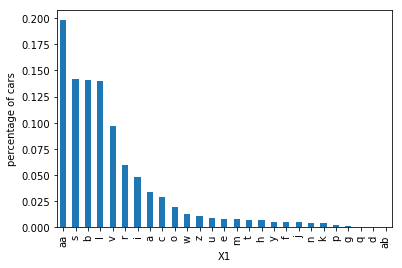

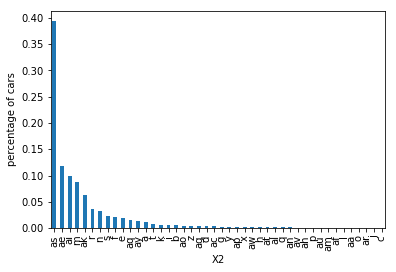

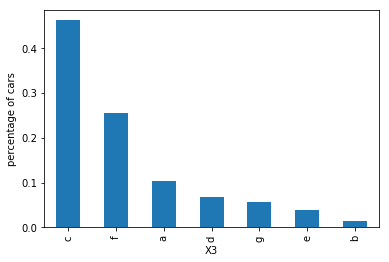

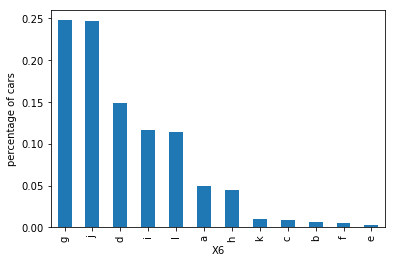

In [6]:
# let's plot how frequently each label appear in the dataset, for each of the categorical variables

total_cars = len(data)
for col in cols_to_use:
    temp_df = pd.Series(data[col].value_counts() / total_cars)
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('percentage of cars')
    plt.show()

We can see that for each of the above variables, some labels appear for more than 10% of the observations in the dataset, but very many appear in less than 10% or even 5% of the observations. These are infrequent labels (Rare Values), and could cause over-fitting.


In [7]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use].fillna(0), data.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 4), (1263, 4))

In [8]:
# let's automate the replacement of infrequent categories for the label 'rare' in all
# categorical variables as we have been doing so far (i.e., by rare or frequent label imputation)

for col in cols_to_use:
    # find non-rare categories:those are the ones we will keep 
    total_cars = len(X_train)
    temp_df = pd.Series(X_train[col].value_counts() / total_cars)
    categories_to_keep = temp_df[temp_df>=0.1].index # non-rare labels
    
    # group observations with infrequent labels under the most frequent label 
    # find frequent label
    frequent_cat = X_train.groupby(col)[col].count().sort_values().tail(1).index.values[0]
       
    # group observations with infrequent labels under new label "Rare"
    # train set
    X_train[col+'_rare_imp'] = np.where(X_train[col].isin(categories_to_keep), X_train[col], 'rare')
    X_test[col+'_rare_imp'] = np.where(X_test[col].isin(categories_to_keep), X_test[col], 'rare')
       
    # replace in train set
    X_train[col+'_freq_imp'] = np.where(X_train[col].isin(categories_to_keep), X_train[col], frequent_cat)
    X_test[col+'_freq_imp'] = np.where(X_test[col].isin(categories_to_keep), X_test[col], frequent_cat)

    
X_train.head()

,X1,X2,X3,X6,X1_rare_imp,X1_freq_imp,X2_rare_imp,X2_freq_imp,X3_rare_imp,X3_freq_imp,X6_rare_imp,X6_freq_imp
3059,aa,ai,c,g,aa,aa,rare,as,c,c,g,g
3014,b,m,c,i,b,b,rare,as,c,c,i,i
3368,o,f,f,l,rare,aa,rare,as,f,f,l,l
2772,aa,as,d,j,aa,aa,as,as,rare,c,j,j
3383,v,e,c,g,rare,aa,rare,as,c,c,g,g


In [9]:
# let's make lists with the variables after the different imputed methods
# or comparatively the original variable
# so we can train random forests using these lists

cols_to_use = ['X1', 'X2','X3', 'X6']
cols_freq = [x+'_freq_imp' for x in cols_to_use]
cols_rare = [x+'_rare_imp' for x in cols_to_use]

In [10]:
[x for x in X_test.X2.unique() if x not in X_train.X2.unique()]

['ar', 'j']

There are 2 categories in the test set not present in the training set, so this will not allow us to build a random forest, somehow, we need to replace this by something else. Therefore, we see quite clearly, that even if rare label does not boost the performance of the algorithm, it is acually required to account for labels present in the test set that are not present in the training set.

In [11]:
frequent_cat = X_train.groupby('X2')['X2'].count().sort_values().tail(1).index.values[0]
frequent_cat

'as'

In [12]:
# here I will replace those 2 by the most frequent category
#so I can build the trees and be able to compare them with the other
# engineered variables

X_test['X2'] = np.where(X_test['X2'].isin(['ar', 'j']), frequent_cat, X_test['X2'])
[x for x in X_test.X2.unique() if x not in X_train.X2.unique()]

[]

Perfect, it worked, now I can continue with the random forest comparison

In [13]:
# I will build RF using the (almost) original variables
labels_to_numbers(X_train, X_test, cols_to_use)
train_rf(X_train, y_train, X_test, y_test, cols_to_use)

Train set
Random Forests mse: 73.52552796670184
Test set
Random Forests mse: 147.79694559295893


In [14]:
# or those in which the infrequent labels were grouped under the 'rare' label
labels_to_numbers(X_train, X_test, cols_rare)
train_rf(X_train, y_train, X_test, y_test, cols_rare)

Train set
Random Forests mse: 120.70163006877415
Test set
Random Forests mse: 156.60887148893417


In [15]:
# or those in which the infrequent labels were grouped under the most frequent label
labels_to_numbers(X_train, X_test, cols_freq)
train_rf(X_train, y_train, X_test, y_test, cols_freq)

Train set
Random Forests mse: 136.65168543109723
Test set
Random Forests mse: 165.94902177678532


Re-grouping the infrequent categories under the new category 'Rare' outperforms replacing the rare labels by the most frequent one (mse test 156 vs 165)  or using the original variables.

### Conclusion

Engineering of rare labels causes in many cases an increased performance of tree based machine learning methods. In addition, to get the most value from the data science / data analysis /  machine learning project, it is a good idea, whenever possible, to understand the distribution of observations among the different labels, the cardinality of the variables, and their relationship to the target.

In [115]:
use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']
df3 = org_df3[use_cols].copy()

df3.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [116]:
cat_feature_df = pd.DataFrame(columns=['Feature','count_distinct_value'])
for e in df3.drop(['SalePrice'],axis=1):
    count_distinct = len(df3[e].unique())
    cat_feature_df = cat_feature_df.append({'Feature':e,'count_distinct_value':count_distinct},ignore_index=True)
    
cat_feature_df.sort_values('count_distinct_value',ascending = False)

,Feature,count_distinct_value
0,Neighborhood,25
2,Exterior2nd,16
1,Exterior1st,15


The variable 'Neighborhood' shows 25 different values, 'Exterior1st' shows 15 different categories, and 'Exterior2nd' shows 16 different categories.

#### Check unique values for each categorical vars

In [117]:
# only consider categorical vars with num of unique values less than or equal to 20
selected_list = df3.drop(['SalePrice'],axis=1)

def analyse_frequency_labels(df, var):
    df = df.copy()
    tmp = df[var].value_counts() / len(df)
    return tmp

for var in selected_list:
    print(analyse_frequency_labels(df3, var))
    print()

NAmes     0.1541
CollgCr   0.1027
OldTown   0.0774
Edwards   0.0685
Somerst   0.0589
Gilbert   0.0541
NridgHt   0.0527
Sawyer    0.0507
NWAmes    0.0500
SawyerW   0.0404
BrkSide   0.0397
Crawfor   0.0349
Mitchel   0.0336
NoRidge   0.0281
Timber    0.0260
IDOTRR    0.0253
ClearCr   0.0192
SWISU     0.0171
StoneBr   0.0171
MeadowV   0.0116
Blmngtn   0.0116
BrDale    0.0110
Veenker   0.0075
NPkVill   0.0062
Blueste   0.0014
Name: Neighborhood, dtype: float64

VinylSd   0.3527
HdBoard   0.1521
MetalSd   0.1507
Wd Sdng   0.1411
Plywood   0.0740
CemntBd   0.0418
BrkFace   0.0342
WdShing   0.0178
Stucco    0.0171
AsbShng   0.0137
Stone     0.0014
BrkComm   0.0014
CBlock    0.0007
AsphShn   0.0007
ImStucc   0.0007
Name: Exterior1st, dtype: float64

VinylSd   0.3452
MetalSd   0.1466
HdBoard   0.1418
Wd Sdng   0.1349
Plywood   0.0973
CmentBd   0.0411
Wd Shng   0.0260
Stucco    0.0178
BrkFace   0.0171
AsbShng   0.0137
ImStucc   0.0068
Brk Cmn   0.0048
Stone     0.0034
AsphShn   0.0021
CBlock    0

#### Plot how frequently each label appears in the dataset

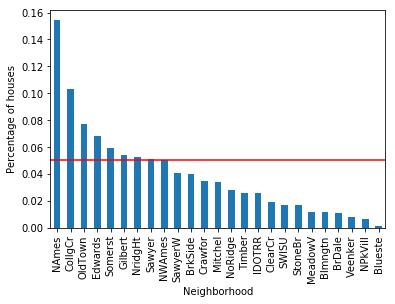

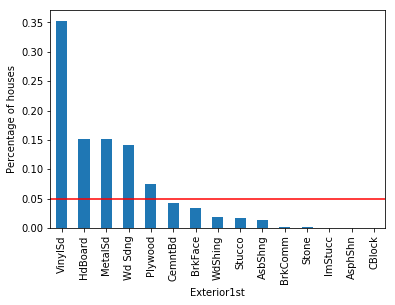

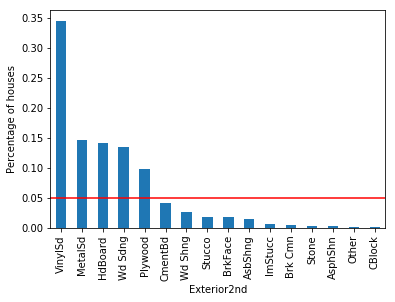

In [118]:
# the percentage of houses in the data with each label

total_houses = len(df3)

# for each categorical variable
for col in selected_list:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(df3[col].value_counts() / total_houses)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

For each of the categorical variables, some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or **Rare Values** and could cause over-fitting.

### 6.5.3. Inspect relationship between rare lables and target

In the following cells, I want to understand the mean SalePrice per group of houses that display each categories.

In [119]:
# the following function calculates:

# 1) the percentage of houses per category
# 2) the mean SalePrice per category


def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,how='left')

    return temp_df

In [120]:
# now we use the function for the variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(df3, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.1541,145847.0800
1,CollgCr,0.1027,197965.7733
2,OldTown,0.0774,128225.3009
3,Edwards,0.0685,128219.7000
4,Somerst,0.0589,225379.8372
5,Gilbert,0.0541,192854.5063
6,NridgHt,0.0527,316270.6234
7,Sawyer,0.0507,136793.1351
8,NWAmes,0.0500,189050.0685
9,SawyerW,0.0404,186555.7966


The above dataframe contains the percentage of houses that show each one of the labels in Neighborhood, and the mean SalePrice for those group of houses. In other words, ~15% of houses are in NAmes and the mean SalePrice is 145847.

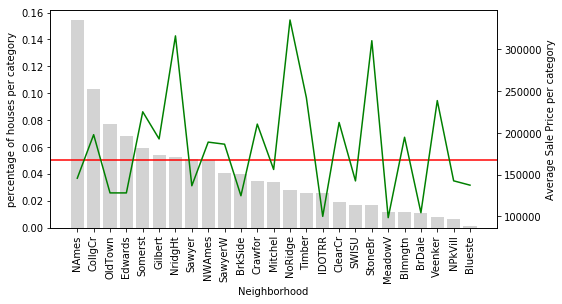

In [121]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()
    
plot_categories(temp_df, 'Neighborhood')

Houses in the 'Neighborhood' of 'NridgHt' sell at a high price, whereas houses in 'Sawyer' tend to be cheaper.

Houses in the 'Neighborhood' of StoneBr have on average a high SalePrice, above 300k. However, StoneBr is present in less than 5% of the houses. Or in other words, less than 5% of the houses in the dataset are located in StoneBr.

Why is this important? Because if we do not have a lot of houses to learn from, we could be under or over-estimating the effect of StoneBr on the SalePrice.

In other words, how confident are we to generalise that most houses in StoneBr will sell for around 300k, when we only have a few houses to learn from?

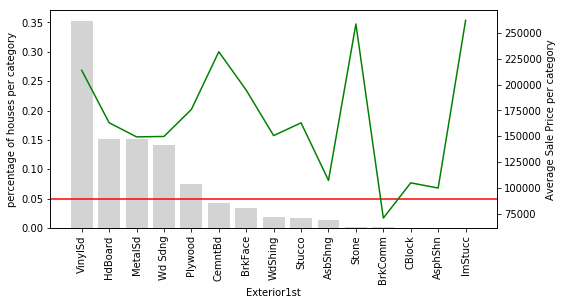

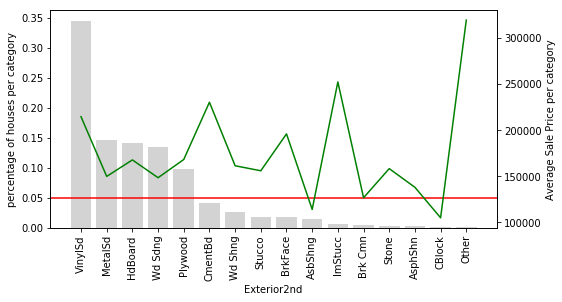

In [122]:
# let's plot the remaining categorical variables

for col in selected_list:
    
    # we plotted this variable already
    if col !='Neighborhood':
        
        # re using the functions I created
        temp_df = calculate_mean_target_per_category(df3, col)
        plot_categories(temp_df, col)

Let's look at variable Exterior2nd: Most of the categories in Exterior2nd are present in less than 5% of houses. In addition, the "SalePrice" varies a lot across those rare categories. The mean value of SalePrice goes up and down over the infrequent categories. In fact, it looks quite noisy. These rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented, we can't be sure whether they have a true impact on the house price. We could be under or over-estimating their impact due to the fact that we have information for few houses.

**Note:** This plot would bring more value, if we plotted the errors of the mean SalePrice. It would give us an idea of how much the mean value of the target varies within each label. Why don't you go ahead and add the standard deviation to the plot?

### 6.5.4.Group rare labels under a new label

One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target. See below.

In [123]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [124]:
# group rare labels in Neighborhood

df3['Neighborhood_grouped'] = group_rare_labels(df3, 'Neighborhood')

df3[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


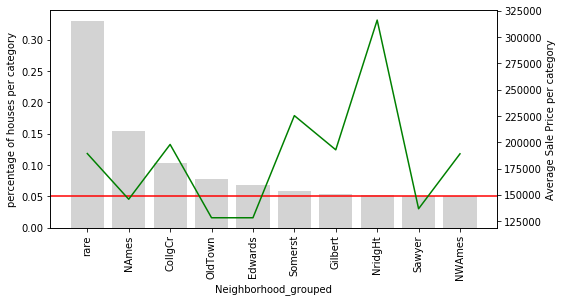

In [125]:
# let's plot Neighborhood with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(df3, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

"Rare" now contains the overall influence of all the infrequent categories on the SalePrice.

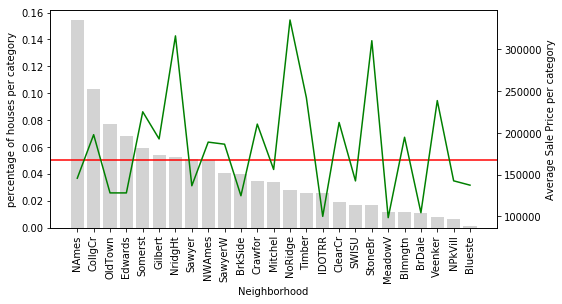

In [126]:
# let's plot the original Neighborhood for comparison
temp_df = calculate_mean_target_per_category(df3, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average SalePrice for all the infrequent labels.

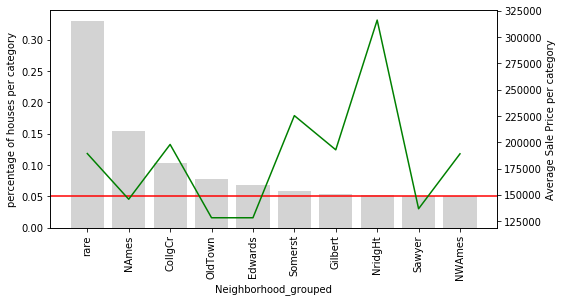

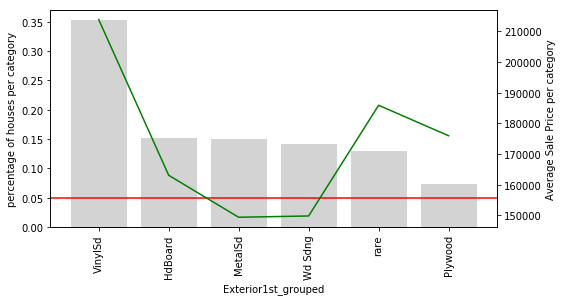

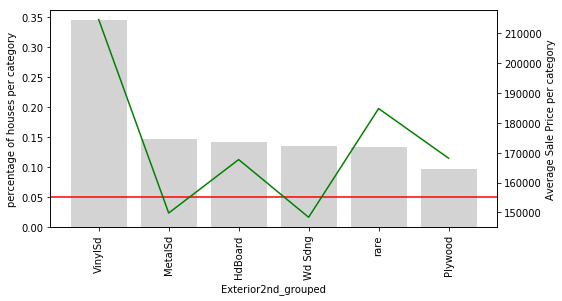

In [127]:
# let's group and plot the remaining categorical variables

for col in selected_list[1:]:
        
    # re using the functions I created
    df3[col+'_grouped'] = group_rare_labels(df3, col)
    temp_df = calculate_mean_target_per_category(df3, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

Here is something interesting: In the variable Exterior1st, look at how all the houses with rare values are on average more expensive than the rest, except for those with VinySd.

The same is true for Exterior2nd. The rare categories seem to have had something in common.

**Note:** Ideally, we would also like to have the standard deviation / inter-quantile range for the SalePrice, to get an idea of how variable the house price is for each category.

# 7. Feature Scaling

## 6.9. Feature Scaling 

### Does the magnitude of the variable matter?

In Linear Regression models, the scale of variables used to estimate the output matters. Linear models are of the type **y = w x + b**, where the regression coefficient w represents the expected change in y for a one unit change in x (the predictor). Thus, the magnitude of w is partly determined by the magnitude of the units being used for x. If x is a distance variable, just changing the scale from kilometers to miles will cause a change in the magnitude of the coefficient.

In addition, in situations where we estimate the outcome y by contemplating multiple predictors x1, x2, ...xn, predictors with greater numeric ranges dominate over those with smaller numeric ranges.

Gradient descent converges faster when all the predictors (x1 to xn) are within a similar scale, therefore having features in a similar scale is useful for Neural Networks as well as.

In Support Vector Machines, feature scaling can decrease the time to find the support vectors.

Finally, methods using Euclidean distances or distances in general are also affected by the magnitude of the features, as Euclidean distance is sensitive to variations in the magnitude or scales of the predictors. Therefore feature scaling is required for methods that utilise distance calculations like k-nearest neighbours (KNN) and k-means clustering.

In summary:

#### Magnitude matters because:

- The regression coefficient is directly influenced by the scale of the variable
- Variables with bigger magnitude / value range dominate over the ones with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.

#### The machine learning models affected by the magnitude of the feature are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)

#### Machine learning models insensitive to feature magnitude are the ones based on Trees:

- Classification and Regression Trees
- Random Forests
- Gradient Boosted Trees

## Normalisation - Standarisation

We saw in previous lectures in section 3 of this course, that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of setting the magnitude of the variables to the same range of values.


#### Normalisation

One method utilised to bring all the variables to a more homogeneous scale is normalisation. Normalisation is synonym of centering the distribution. This means subtracting the mean of the variable to each observation. This procedure will "center" the new distribution at zero (the new mean of the variable will now be zero).

#### Standarisation

Standarisation is also used to bring all the variables to a similar scale. Standarisation means centering the variable at zero, and standarising the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x_mean) /  std

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Let's demonstrate the procedure of standarisation on the titanic dataset.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
# let's have a look at the values of those variables to get an idea of the magnitudes
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


The different variables present different value ranges, therefore different magnitudes. Not only the minimum and maximum values are different, but they also spread over ranges of different widths.

In [4]:
# let's look at missing data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [5]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
# let's fill first the missing data

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

### Standarisation

StandardScaler from scikit-learn removes the mean and scales the data to unit variance. 

In [7]:
# standarisation: we use the StandardScaler from sklearn

scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it
X_test_scaled = scaler.transform(X_test) # transform the test set

In [8]:
#let's have a look at the scaled training dataset: mean and standard deviation

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [  4.98976640e-17   1.16903099e-16   5.41746067e-17]
std (Pclass, Age and Fare):  [ 1.  1.  1.]


As expected, the mean of each variable is now around zero and the standard deviation is set to 1. Thus, all the variable  values lie within the same range.

In [9]:
# let's look at the transformed min and max values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.5325562  -2.23351124 -0.67314402]
Max values (Pclass, Age and Fare):  [ 0.84844757  3.86209655  9.95192344]


However, the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers. We observed in previous lectures that the variable Fare has a few extreme outliers, that is, people that paid extraordinarily high Fares. Those observations would drive the value of the maximum value far away from the unit variance (a value of 9.9 in this case).

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([-2.23351124, -1.92873085, -1.62395046, -1.31917007, -1.01438968,
        -0.70960929, -0.4048289 , -0.10004851,  0.20473188,  0.50951227,
         0.81429266,  1.11907305,  1.42385344,  1.72863383,  2.03341422,
         2.33819461,  2.642975  ,  2.94775539,  3.25253577,  3.55731616,
         3.86209655]),
 <a list of 20 Patch objects>)

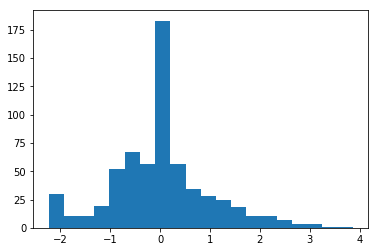

In [10]:
# let's look at the distribution of the transformed variable Age

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([-0.67314402, -0.14189064,  0.38936273,  0.9206161 ,  1.45186948,
         1.98312285,  2.51437622,  3.04562959,  3.57688297,  4.10813634,
         4.63938971,  5.17064309,  5.70189646,  6.23314983,  6.76440321,
         7.29565658,  7.82690995,  8.35816333,  8.8894167 ,  9.42067007,
         9.95192344]),
 <a list of 20 Patch objects>)

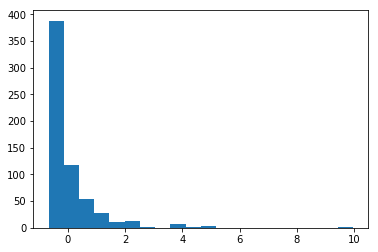

In [11]:
# let's look at the distribution of the transformed variable Fare

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot. In fact, we can see that the standarisation of Fare, shrinks the majority of the observations towards the lowest values.

In [12]:
import seaborn as sns

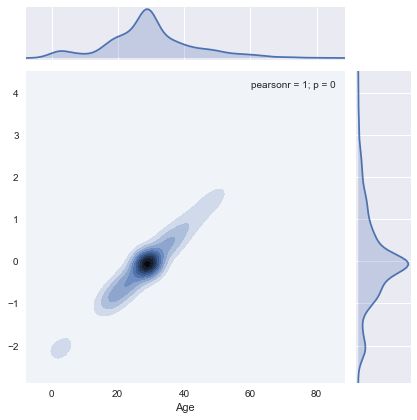

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

The transformed variable has a good correlation with the original one.

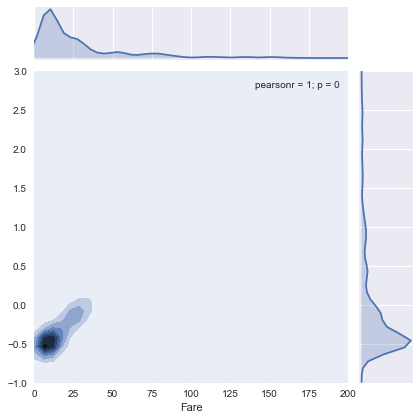

In [14]:
# let's look at how transformed Fare looks like compared to the original variable

sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

The values are concentrated on the lower left side of the plot, because Fare is highly skewed: the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values as shown in the left figure above.

Other scaling methods account for the presence of outliers. I will discuss those in the next lectures.

## Scaling to minimum and maximum values

We saw in previous lectures that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of squeezing the magnitude of the variables.


Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the range:

X_scaled = (X - X.min / (X.max - X.min)

The minimum maximum scaling method has the same disadvantage that standarisation, which is that it compresses the observations in the narrow range if the variable is very skewed or has outliers. 

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Let's demonstrate the MinMaxScaling method using scikit-learn.


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
# let's have a look at the values of those variables to get an idea of the magnitudes

data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


We can see from the above statistics table that the magnitudes of the variables are different. The mean values and medians are different as well as the maximum values and the range over which the values are spread.

In [4]:
# check missing data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [5]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
# fill missing data with the Age median

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

### Min_max_scaling

In [7]:
# this scales the features between 0 and 1.

scaler = MinMaxScaler() # create an instance
X_train_scaled = scaler.fit_transform(X_train) #  fit  the scaler to the train set and then transform it
X_test_scaled = scaler.transform(X_test) # transform (scale) the test set

In [8]:
#let's have a look at the scaled training dataset: mean and standard deviation

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [ 0.64365971  0.36641321  0.06335433]
std (Pclass, Age and Fare):  [ 0.41999093  0.16405255  0.09411705]


After MinMaxScaling, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.

In [9]:
# let's look at the new minimum and maximum values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [ 0.  0.  0.]
Max values (Pclass, Age and Fare):  [ 1.  1.  1.]


But the minimum and maximum values are standarised across variables, different from what occurs with standarisation.

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

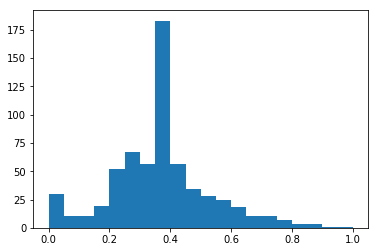

In [10]:
# let's look at the distributions of the transformed variables: Age

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

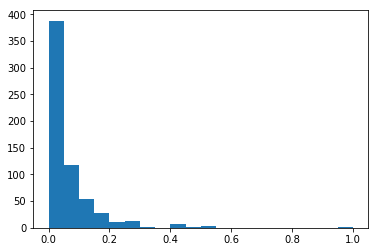

In [11]:
# let's look at the distributions of the transformed variables: Fare

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot. In fact, we can see that the MinMaxScaling of Fare, shrinks the majority of the observations towards the lowest values.

In [12]:
import seaborn as sns

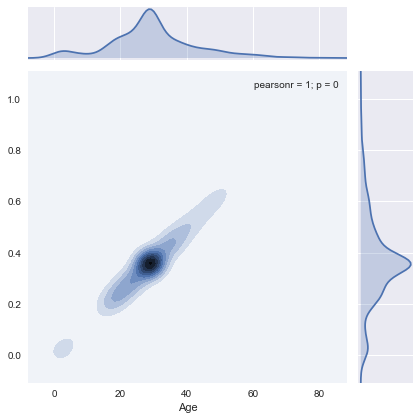

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

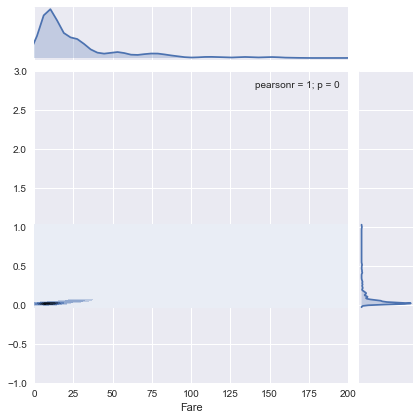

In [14]:
# let's look at how transformed Fare looks like compared to the original variable


sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

As we can see from the above plot, MinMaxScaler is very sensitive to the presence of outliers. It compressed all inliers in the narrow range [0, 0.01] limiting the spread of the variable, and therefore, very likely it would affect the predictive power of this feature.

## Scaling to median and quantiles

We saw in previous lectures that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of squeezing the magnitude of the variables.


Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


Let's demonstrate the Median and Quantile scaling method using scikit-learn. The function of sklearn to perform this procedure is the RobustScaler

In [1]:
import pandas as pd
import numpy as np

# RobustScaler from sklearn performs the above described operation
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
# let's have a look at the values of those variables to get an idea of the magnitudes
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


We can see from the above statistics table that the magnitudes of the variables are different. The mean values and medians are different as well as the maximum values and the range over which the values are spread.

In [4]:
# let's check at missing  data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [5]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
# let's fill the missing data

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

### Robust Scaler

In [7]:
# robust scaler

scaler = RobustScaler() # call the object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then scale it
X_test_scaled = scaler.transform(X_test) # scale the test set

In [8]:
#let's have a look at the scaled training dataset

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [-0.47512039  0.0567354   0.7440926 ]
std (Pclass, Age and Fare):  [ 0.55998791  1.00109914  2.05514812]


As you can see, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.

In [9]:
# let's look at the new minimum and maximum values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.33333333 -2.17923077 -0.63931806]
Max values (Pclass, Age and Fare):  [  0.           3.92307692  21.19676931]


Neither are the minimum and maximum values set to a certain upper and lower boundaries like in the MinMaxScaler

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([-2.17923077, -1.87411538, -1.569     , -1.26388462, -0.95876923,
        -0.65365385, -0.34853846, -0.04342308,  0.26169231,  0.56680769,
         0.87192308,  1.17703846,  1.48215385,  1.78726923,  2.09238462,
         2.3975    ,  2.70261538,  3.00773077,  3.31284615,  3.61796154,
         3.92307692]),
 <a list of 20 Patch objects>)

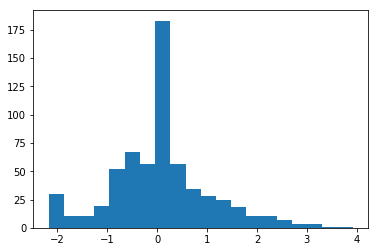

In [10]:
# let's look at the distribution of Age transformed

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([ -0.63931806,   0.45248631,   1.54429068,   2.63609505,
          3.72789941,   4.81970378,   5.91150815,   7.00331252,
          8.09511689,   9.18692126,  10.27872563,  11.37052999,
         12.46233436,  13.55413873,  14.6459431 ,  15.73774747,
         16.82955184,  17.92135621,  19.01316058,  20.10496494,  21.19676931]),
 <a list of 20 Patch objects>)

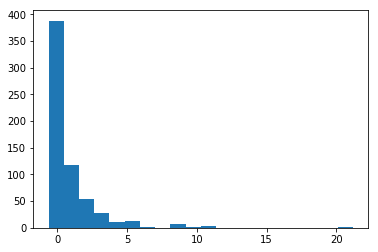

In [11]:
# let's look at the distribution of Fare transformed

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot.

In [12]:
import seaborn as sns

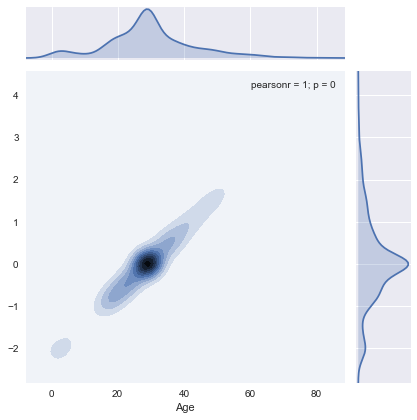

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

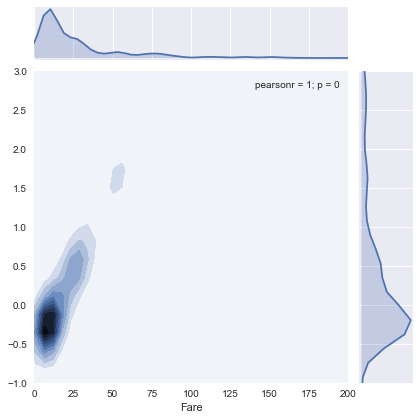

In [14]:
# let's look at how transformed Fare looks like compared to the original variable

sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

As we can see, The robust scaler does a better job at preserving the spread of the variable after transformation for skewed variables like Fare (compare with the standard scaler or the MinMaxScaler)

### Conclusions

Typically, at the time of setting the features within a similar scale for Machine Learning, standarisation is the normalisation method of choice. And this is done without taking into account the distribution of the variable.

However, we have seen in the past 3 lectures that the different normalisation methods have different advantages and disadvantages, and when the distribution of the variable is skewed, perhaps it is better to scale using the mean and quantiles method, which is more robust to the presence of outliers.

# 8. Engineering Temporal Vars

In [1]:
import pandas as pd
import numpy as np

import datetime

In [2]:
# let's load the Lending Club dataset with a few selected columns
# just a few rows to speed things up

use_cols = ['issue_d', 'last_pymnt_d']
data = pd.read_csv('loan.csv', usecols=use_cols, nrows=10000)
data.head()

,issue_d,last_pymnt_d
0,Dec-2011,Jan-2015
1,Dec-2011,Apr-2013
2,Dec-2011,Jun-2014
3,Dec-2011,Jan-2015
4,Dec-2011,Jan-2016


In [3]:
# now let's parse the dates, currently coded as strings, into datetime format

data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d','issue_dt','last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2011,2011-12-01,Jan-2015,2015-01-01
1,Dec-2011,2011-12-01,Apr-2013,2013-04-01
2,Dec-2011,2011-12-01,Jun-2014,2014-06-01
3,Dec-2011,2011-12-01,Jan-2015,2015-01-01
4,Dec-2011,2011-12-01,Jan-2016,2016-01-01


In [4]:
# Extracting Month from date

data['issue_dt_month'] = data['issue_dt'].dt.month

data[['issue_dt', 'issue_dt_month']].head()

,issue_dt,issue_dt_month
0,2011-12-01,12
1,2011-12-01,12
2,2011-12-01,12
3,2011-12-01,12
4,2011-12-01,12


In [5]:
data[['issue_dt', 'issue_dt_month']].tail()

,issue_dt,issue_dt_month
9995,2011-08-01,8
9996,2011-08-01,8
9997,2011-08-01,8
9998,2011-08-01,8
9999,2011-08-01,8


In [6]:
# Extract quarter from date variable

data['issue_dt_quarter'] = data['issue_dt'].dt.quarter

data[['issue_dt', 'issue_dt_quarter']].head()

,issue_dt,issue_dt_quarter
0,2011-12-01,4
1,2011-12-01,4
2,2011-12-01,4
3,2011-12-01,4
4,2011-12-01,4


In [7]:
data[['issue_dt', 'issue_dt_quarter']].tail()

,issue_dt,issue_dt_quarter
9995,2011-08-01,3
9996,2011-08-01,3
9997,2011-08-01,3
9998,2011-08-01,3
9999,2011-08-01,3


In [8]:
# We could also extract semester

data['issue_dt_semester'] = np.where(data.issue_dt_quarter.isin([1,2]),1,2)
data.head()

,issue_d,last_pymnt_d,issue_dt,last_pymnt_dt,issue_dt_month,issue_dt_quarter,issue_dt_semester
0,Dec-2011,Jan-2015,2011-12-01,2015-01-01,12,4,2
1,Dec-2011,Apr-2013,2011-12-01,2013-04-01,12,4,2
2,Dec-2011,Jun-2014,2011-12-01,2014-06-01,12,4,2
3,Dec-2011,Jan-2015,2011-12-01,2015-01-01,12,4,2
4,Dec-2011,Jan-2016,2011-12-01,2016-01-01,12,4,2


In [9]:
# day - numeric from 1-31

data['issue_dt_day'] = data['issue_dt'].dt.day

data[['issue_dt', 'issue_dt_day']].head()

,issue_dt,issue_dt_day
0,2011-12-01,1
1,2011-12-01,1
2,2011-12-01,1
3,2011-12-01,1
4,2011-12-01,1


In [10]:
# day of the week - from 0 to 6

data['issue_dt_dayofweek'] = data['issue_dt'].dt.dayofweek

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2011-12-01,3
1,2011-12-01,3
2,2011-12-01,3
3,2011-12-01,3
4,2011-12-01,3


In [11]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

,issue_dt,issue_dt_dayofweek
9995,2011-08-01,0
9996,2011-08-01,0
9997,2011-08-01,0
9998,2011-08-01,0
9999,2011-08-01,0


In [12]:
# day of the week - name

data['issue_dt_dayofweek'] = data['issue_dt'].dt.weekday_name

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2011-12-01,Thursday
1,2011-12-01,Thursday
2,2011-12-01,Thursday
3,2011-12-01,Thursday
4,2011-12-01,Thursday


In [13]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

,issue_dt,issue_dt_dayofweek
9995,2011-08-01,Monday
9996,2011-08-01,Monday
9997,2011-08-01,Monday
9998,2011-08-01,Monday
9999,2011-08-01,Monday


In [14]:
# was the application done on the weekend?

data['issue_dt_is_weekend'] = np.where(data['issue_dt_dayofweek'].isin(['Sunday', 'Saturday']), 1,0)
data[['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
0,2011-12-01,Thursday,0
1,2011-12-01,Thursday,0
2,2011-12-01,Thursday,0
3,2011-12-01,Thursday,0
4,2011-12-01,Thursday,0


In [15]:
data[data.issue_dt_is_weekend==1][['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
4269,2011-10-01,Saturday,1
4280,2011-10-01,Saturday,1
4287,2011-10-01,Saturday,1
4290,2011-10-01,Saturday,1
4293,2011-10-01,Saturday,1


In [16]:
# extract year 

data['issue_dt_year'] = data['issue_dt'].dt.year

data[['issue_dt', 'issue_dt_year']].head()

,issue_dt,issue_dt_year
0,2011-12-01,2011
1,2011-12-01,2011
2,2011-12-01,2011
3,2011-12-01,2011
4,2011-12-01,2011


In [17]:
# perhaps more interestingly, extract the date difference between 2 dates

data['issue_dt'] - data['last_pymnt_dt']


0      -1127 days
1       -487 days
2       -913 days
3      -1127 days
4      -1492 days
5      -1127 days
6      -1492 days
7      -1127 days
8       -122 days
9       -336 days
10      -548 days
11      -640 days
12      -213 days
13     -1127 days
14      -670 days
15     -1127 days
16     -1127 days
17      -517 days
18     -1158 days
19      -213 days
20     -1339 days
21      -640 days
22     -1127 days
23      -670 days
24      -305 days
25      -275 days
26            NaT
27      -366 days
28      -487 days
29     -1096 days
          ...    
9970   -1096 days
9971   -1188 days
9972    -519 days
9973    -274 days
9974   -1096 days
9975   -1004 days
9976    -274 days
9977   -1096 days
9978   -1096 days
9979    -762 days
9980   -1492 days
9981    -397 days
9982   -1004 days
9983     -31 days
9984    -974 days
9985   -1096 days
9986   -1096 days
9987    -731 days
9988    -853 days
9989    -915 days
9990    -244 days
9991   -1096 days
9992   -1096 days
9993    -458 days
9994   -16

In [18]:
# same as above capturing just the time difference
(data['last_pymnt_dt']-data['issue_dt']).dt.days.head()

0    1127.0
1     487.0
2     913.0
3    1127.0
4    1492.0
dtype: float64

In [19]:
# or the time difference to today, or any other day of reference

(datetime.datetime.today() - data['issue_dt']).head()

0   2215 days 17:19:22.155930
1   2215 days 17:19:22.155930
2   2215 days 17:19:22.155930
3   2215 days 17:19:22.155930
4   2215 days 17:19:22.155930
Name: issue_dt, dtype: timedelta64[ns]

In [20]:
(datetime.datetime.today() - data['issue_dt']).tail()

9995   2337 days 17:19:22.173943
9996   2337 days 17:19:22.173943
9997   2337 days 17:19:22.173943
9998   2337 days 17:19:22.173943
9999   2337 days 17:19:22.173943
Name: issue_dt, dtype: timedelta64[ns]

**Similarly, if this variable had time as well, we could calculate, at what time the application was done in hrs for example, and then segregate it in: morning-afternoon-evening.**

Very common date differences used in the industry include "age" using "date of birth" and the "time of application" (i.e., how old was the applicant when they applied for a loan). Other examples include how long the applicant has lived at th declared address.

### Note

Once preprocessed in these ways, the variables are ready to be used in machine learning models following typical preprocessing of numerical or categorical variables, as shown in previous and future sections in this course.

# 9. Text Vars

### address

 Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [454]:
cat_df['zip_code'] = cat_df['address'].apply(lambda address:address[-5:])

# 9. Feature Generation

### 6.2.1. Extract title from Name

In [618]:
def get_title(passenger):
    # extracts the title from the name variable
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
df['Title'] = df['Name'].apply(get_title)
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [619]:
# drop the original variable
df.drop(labels='Name', inplace=True, axis=1)

### 6.2.2. Calculate family size

1     0.602694
2     0.180696
3     0.114478
4     0.032548
6     0.024691
5     0.016835
7     0.013468
11    0.007856
8     0.006734
Name: Family_size, dtype: float64


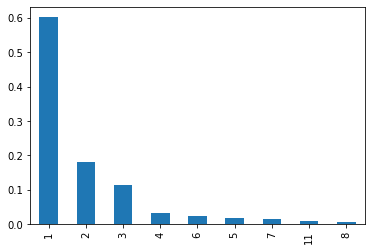

In [620]:
# create a variable indicating family size (including the passenger)
# sums siblings and parents
df['Family_size'] = df['SibSp']+df['Parch']+1

print(df.Family_size.value_counts()/ np.float(len(df)))
(df.Family_size.value_counts() / np.float(len(df))).plot.bar()

The new variable Family size is discrete, because it is the sum of 2 discrete variables. It takes a finite number of values, and large families were rare on the Titanic. In fact, families larger than 7 people were rare, so I will **cap family size at 7**.

### 6.2.3. Variable indicating if passenger was a mother

In [621]:
# variable indicating if passenger was a mother
df['is_mother'] = np.where((df.Sex =='female')&(df.Parch>=1)&(df.Age>18),1,0)
df[['Sex', 'Parch', 'Age', 'is_mother']].head()

,Sex,Parch,Age,is_mother
0,male,0,22.0,0
1,female,0,38.0,0
2,female,0,26.0,0
3,female,0,35.0,0
4,male,0,35.0,0


In [622]:
df.loc[df.is_mother==1, ['Sex', 'Parch', 'Age', 'is_mother']].head()

,Sex,Parch,Age,is_mother
8,female,2,27.0,1
25,female,5,38.0,1
88,female,2,23.0,1
98,female,1,34.0,1
136,female,2,19.0,1


In [623]:
print('there were {} mothers in the Titanic'.format(df.is_mother.sum()))

there were 64 mothers in the Titanic


# Engineer labels of categorical variables

### 6.10.1. One Hot Encoding

One hot encoding, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation.

Each one of the boolean variables are also known as **dummy variables** or binary variables.

For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise. 

#### Advantages

- Straightforward to implement
- Makes no assumption
- Keeps all the information of the categorical variable

#### Disadvantages

- Does not add any information that may make the variable more predictive
- If the variable has loads of categories, then OHE increases the feature space dramatically

In [2]:
# one hot encoding

pd.get_dummies(data).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [3]:
# for better visualisation
pd.concat([data, pd.get_dummies(data)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


As you may have noticed, we only need 1 of the 2 dummy variables to represent the original categorical variable Sex. Any of the 2 will suffice, and it doesn't matter which one we select, since they are equivalent.

Therefore, to encode a categorical variable with 2 labels, we need 1 dummy variable. 

To extend this concept, to encode  categorical variable with k labels, we need k-1 dummy variables.

How can we get this using pandas?

In [4]:
# obtaining k-1 labels
pd.get_dummies(data, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [5]:
# Let's now look at an example with more than 2 labels

data=pd.read_csv('titanic.csv', usecols=['Embarked'])
data.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [6]:
# check the number of different labels
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
# get whole set of dummy variables

pd.get_dummies(data).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
# get k-1 dummy variables

pd.get_dummies(data, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [9]:
# we can also add an additional dummy variable to indicate whether there was missing data

pd.get_dummies(data, drop_first=True, dummy_na=True).head()

,Embarked_Q,Embarked_S,Embarked_nan
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [10]:
# by summing the number of 1s per boolean variable over the rows of the dataset, we get to know how
# many observations we have for each variable (i.e., each category)

pd.get_dummies(data, drop_first=True, dummy_na=True).sum(axis=0)

Embarked_Q       77
Embarked_S      644
Embarked_nan      2
dtype: int64

### Notes

Both pandas and sklearn will provide a whole set of dummy variables from a categorical variable. This is, instead of returning k-1 binary variables, they will return k, with the option in pandas of dropping the first binary variable and obtain k-1.

### When should you use k and when k-1?

When the original variable is binary, that is, when the original variable has only 2 labels, then you should create **one and only one** binary variable.

When the original variable has more than 2 labels, the following is important:

#### One hot encoding into k-1:
One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (removed) binary variable. As an example, for the variable gender encoded into male, if the observation is 0, then it has to be female. We do not need the additional female variable to explain that. 

One hot encoding with k-1 binary variables should be used in linear regression, to keep the correct number of degrees of freedom (k-1). The linear regression has access to all of the features as it is being trained, and therefore examines altogether the whole set of dummy variables. This means that k-1 binary variables give the whole information about (represent completely) the original categorical variable to the linear regression.

And the same is true for all machine learning algorithms that look at ALL the features at the same time during training. For example, support vector machines and neural networks as well. And clustering algorithms.

#### One hot encoding into k dummy variables

However, tree based models select at each iteration only a group of features to make a decision. This is to separate the data at each node. Therefore, the last category, the one that was removed in the one hot encoding into k-1 variables, would only be taken into account by those splits or even trees, that use the entire set of binary variables at a time. And this would rarely happen, because each split usually uses 1-3 features to make a decision. So, tree based methods will never consider that additional label, the one that was dropped. Thus, if the categorical variables will be used in a tree based learning algorithm, it is good practice to encode it into k binary variables instead of k-1.

Finally, if you are planning to do feature selection, you will also need the entire set of binary variables (k) to let the machine learning model select which ones have the most predictive power.

Let's train a model on data with categorical variables re-encoded with One Hot Encoding.

In [13]:
# let's make a copy of the dataset, in which we encode the categorical variables using OHE

data_OHE = pd.concat([data[['Pclass', 'Age', 'SibSp','Parch', 'Survived']], # numerical variables 
                      pd.get_dummies(data.Sex, drop_first=True),   # binary categorical variable
                      pd.get_dummies(data.Embarked, drop_first=True)],  # k categories in categorical
                    axis=1)

data_OHE.head()

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


### 6.10.2. One Hot encoding of top variables

#### Advantages

- Straightforward to implement
- Does not require hrs of variable exploration
- Does not expand massively the feature space (number of columns in the dataset)

#### Disadvantages

- Does not add any information that may make the variable more predictive
- Does not keep the information of the ignored labels


Because it is not unusual that categorical variables have a few dominating categories and the remaining labels add mostly noise, this is a quite simple and straightforward approach that may be useful on many occasions.

It is worth noting that the top 10 variables is a totally arbitrary number. You could also choose the top 5, or top 20.

This modelling was more than enough for the team to win the KDD 2009 cup. They did do some other powerful feature engineering as we will see in following lectures, that improved the performance of the variables dramatically.

In [1]:
import pandas as pd
import numpy as np

# let's load the mercedes benz dataset for demonstration, only the categorical variables

data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [2]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


In [3]:
# let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(data, drop_first=True).shape

(4209, 117)

We can see that from just 6 initial categorical variables, we end up with 117 new variables. 

These numbers are still not huge, and in practice we could work with them relatively easily. However, in business datasets and also other Kaggle or KDD datasets, it is not unusual to find several categorical variables with multiple labels. And if we use one hot encoding on them, we will end up with datasets with thousands of columns.

What can we do instead?

In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf), the authors limit one hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only. This is equivalent to grouping all the other labels under a new category, that in this case will be dropped. Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (0) for a particular observation.

How can we do that in python?

In [4]:
# let's find the top 10 most frequent categories for the variable X2

data.X2.value_counts().sort_values(ascending=False).head(10)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64

In [5]:
# let's make a list with the most frequent categories of the variable

top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [6]:
# and now we make the 10 binary variables

for label in top_10:
    data[label] = np.where(data['X2']==label, 1, 0)

data[['X2']+top_10].head(10)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [7]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label, 1, 0)

# read the data again
data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

# encode X2 into the 10 most frequent categories
one_hot_top_x(data, 'X2', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [8]:
# find the 10 most frequent categories for X1
top_10 = [x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

# now create the 10 most frequent dummy variables for X1
one_hot_top_x(data, 'X1', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 6.10.3. Ordinal numbering encoding

**Ordinal categorical variables**

Categorical variable which categories can be meaningfully ordered are called ordinal. For example:

- Student's grade in an exam (A, B, C or Fail).
- Days of the week can be ordinal with Monday = 1, and Sunday = 7.
- Educational level, with the categories: Elementary school,  High school, College graduate, PhD ranked from 1 to 4.

When the categorical variable is ordinal, the most straightforward approach is to replace the labels by some ordinal number.

### Advantages

- Keeps the semantical information of the variable (human readable content)
- Straightforward

### Disadvantage

- Does not add machine learning valuable information

In [1]:
import pandas as pd
import datetime

In [2]:
# create a variable with dates, and from that extract the weekday
# I create a list of dates with 30 days difference from today
# and then transform it into a datafame

base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, 30)]
df = pd.DataFrame(date_list)
df.columns = ['day']
df

,day
0,2017-11-24 23:37:17.497960
1,2017-11-23 23:37:17.497960
2,2017-11-22 23:37:17.497960
3,2017-11-21 23:37:17.497960
4,2017-11-20 23:37:17.497960
5,2017-11-19 23:37:17.497960
6,2017-11-18 23:37:17.497960
7,2017-11-17 23:37:17.497960
8,2017-11-16 23:37:17.497960
9,2017-11-15 23:37:17.497960


In [3]:
# extract the week day name

df['day_of_week'] = df['day'].dt.weekday_name
df.head()

,day,day_of_week
0,2017-11-24 23:37:17.497960,Friday
1,2017-11-23 23:37:17.497960,Thursday
2,2017-11-22 23:37:17.497960,Wednesday
3,2017-11-21 23:37:17.497960,Tuesday
4,2017-11-20 23:37:17.497960,Monday


In [4]:
# Engineer categorical variable by ordinal number replacement

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(10)

,day,day_of_week,day_ordinal
0,2017-11-24 23:37:17.497960,Friday,5
1,2017-11-23 23:37:17.497960,Thursday,4
2,2017-11-22 23:37:17.497960,Wednesday,3
3,2017-11-21 23:37:17.497960,Tuesday,2
4,2017-11-20 23:37:17.497960,Monday,1
5,2017-11-19 23:37:17.497960,Sunday,7
6,2017-11-18 23:37:17.497960,Saturday,6
7,2017-11-17 23:37:17.497960,Friday,5
8,2017-11-16 23:37:17.497960,Thursday,4
9,2017-11-15 23:37:17.497960,Wednesday,3


We can now use the variable day_ordinal in sklearn to build machine learning models.

### 6.10.4. Count or frequency encoding

Another way to refer to variables that have a multitude of categories, is to call them variables with **high cardinality**.

We observed in the previous lecture, that if a categorical variable contains multiple labels, then by re-encoding them using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.

There is not any rationale behind this transformation, other than its simplicity.

### Advantages

- Simple
- Does not expand the feature space

### Disadvantages

-  If 2 labels appear the same amount of times in the dataset, that is, contain the same number of observations, they will be merged: may loose valuable information
- Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# let's open the mercedes benz dataset for demonstration

data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'y'])
data.head()

,y,X1,X2,X3,X4,X5,X6
0,130.81,v,at,a,d,u,j
1,88.53,t,av,e,d,y,l
2,76.26,w,n,c,d,x,j
3,80.62,t,n,f,d,x,l
4,78.02,v,n,f,d,h,d


In [2]:
# let's have a look at how many labels

for col in data.columns[1:]:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


### Important

When doing count transformation of categorical variables, it is important to calculate the count (or frequency = count/total observations) **over the training set**, and then use those numbers to replace the labels in the test set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], data.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 6), (1263, 6))

In [4]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

X_train.X2.value_counts().to_dict()

{'a': 34,
 'aa': 1,
 'ac': 10,
 'ae': 342,
 'af': 1,
 'ag': 15,
 'ah': 3,
 'ai': 289,
 'ak': 188,
 'al': 3,
 'am': 1,
 'an': 3,
 'ao': 10,
 'ap': 5,
 'aq': 46,
 'as': 1155,
 'at': 5,
 'au': 3,
 'av': 2,
 'aw': 2,
 'ay': 40,
 'b': 12,
 'c': 1,
 'd': 12,
 'e': 61,
 'f': 59,
 'g': 10,
 'h': 4,
 'i': 15,
 'k': 16,
 'l': 1,
 'm': 284,
 'n': 97,
 'o': 1,
 'p': 1,
 'q': 3,
 'r': 101,
 's': 63,
 't': 17,
 'x': 8,
 'y': 8,
 'z': 14}

In [5]:
# lets look at X_train so we can compare then the variable re-coding

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,ai,c,d,q,g
3014,b,m,c,d,q,i
3368,o,f,f,d,s,l
2772,aa,as,d,d,p,j
3383,v,e,c,d,s,g


In [6]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
X_frequency_map = X_train.X2.value_counts().to_dict()

# and now we replace X2 labels both in train and test set with the same map
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,289,c,d,q,g
3014,b,284,c,d,q,i
3368,o,59,f,d,s,l
2772,aa,1155,d,d,p,j
3383,v,61,c,d,s,g


Where in the original dataset, for the observation 1 in the variable 2 before it was 'ai', now it was replaced by the count 289. And so on for the rest of the categories (compare outputs 5 and 6).

### Note

I want you to keep in mind something important:

If a category is present in the test set, that was not present in the train set, this method will generate missing data in the test set. This is why it is extremely important to handle rare categories, as we say in section 6 of this course.

Then we can combine rare label replacement plus categorical encoding with counts like this: we may choose to replace the 10 most frequent labels by their count, and then group all the other labels under one label (for example "Rare"), and replace "Rare" by its count, to account for what I just mentioned.

In coming sections I will explain more methods of categorical encoding. I want you to keep in mind that There is no rule of thumb to indicate which method you should use to encode categorical variables. It is mostly up to what makes sense for the data, and it also depends on what you are trying to achieve. In general, for data competitions, we value more model predictive power, whereas in business scenarios we want to capture and understand the information, and generally, we want to transform variables in a way that it makes 'Business sense'. Some of your common sense and a lot of conversation with the people that understand the data well will be required to encode categorical labels.


### 6.10.5. Target guided ordinal encoding 

In the previous lectures in this section on how to engineer the labels of categorical variables, we learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Create a monotonic relationship between the variable and the target
- Do not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".

### Ordering  labels according to the target

Ordering the labels according to the target means assigning a number to the label, but this numbering, this ordering, is informed by the mean of the target within the label.

Briefly, we calculate the mean of the target for each label/category, then we order the labels according to these mean from smallest to biggest, and we number them accordingly.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique()) # check number of different labels in Cabin

148

In [5]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels again, we have much less categories in Cabin now

data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The ordering of the labels should be done considering the target ONLY on the training set, and then expanded it to the test set.
See below.

In [7]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Cabin', 'Survived']], data.Survived, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [8]:
# now we order the labels according to the mean target value

X_train.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.303609
A    0.428571
G    0.500000
C    0.571429
F    0.666667
D    0.692308
E    0.740741
B    0.774194
Name: Survived, dtype: float64

In [9]:
# now we generate an ordered list with the labels

X_train.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'D', 'E', 'B'], dtype='object', name='Cabin')

In [10]:
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [11]:
# and now we create a dictionary that maps each label to the number

ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'A': 2, 'B': 8, 'C': 4, 'D': 6, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

This method assigned the number 0 to T, the category with the lowest target mean, and 8 to B, the category with the highest target mean.

In [12]:
# replace the labels with the ordered numbers
# both in train and test set (note that we created the dictionary only using the training set)

X_train['Cabin_ordered'] = X_train.Cabin.map(ordinal_label)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordinal_label)

In [13]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,7
52,D,1,6
386,M,0,1
124,D,0,6
578,M,0,1


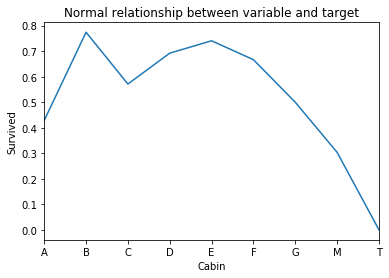

In [14]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

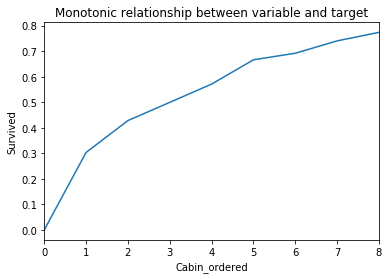

In [15]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

There is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand, as we explained in previous sections.

### 6.10.6. Mean encoding

In the previous lectures in this section on how to engineer the labels of categorical variables, we learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Creates a monotonic relationship between the variable and the target
- Does not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".


### Replace labels by the Risk Factor

Replacing labels by the risk factor means essentially replacing the label by the mean of the target for that label. 

I have only seen this procedure applied in classifications scenarios, where the target can take just the values of 1 or 0. However, in principle, I don't see why this shouldn't be possible as well when the target is continuous. Just be mindful of over-fitting.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique()) # check number of different labels in Cabin

148

In [5]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The risk factor should be calculated per label considering ONLY on the training set, and then expanded it to the test set.
See below.

In [7]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [8]:
# let's calculate the target frequency for each label

X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [9]:
# and now let's do the same but capturing the result in a dictionary

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ordered_labels

{'A': 0.42857142857142855,
 'B': 0.77419354838709675,
 'C': 0.5714285714285714,
 'D': 0.69230769230769229,
 'E': 0.7407407407407407,
 'F': 0.66666666666666663,
 'G': 0.5,
 'M': 0.30360934182590232,
 'T': 0.0}

In [10]:
# replace the labels with the 'risk' (target frequency)
# note that we calculated the frequencies based on the training set only

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [11]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


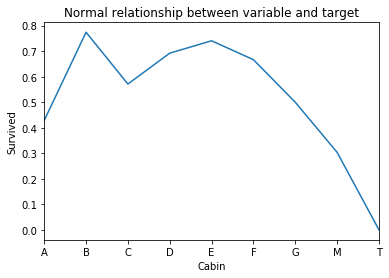

In [12]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

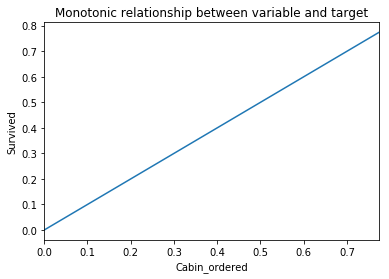

In [13]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

Here the relationship lies perfectly on a diagonal line, because this is how we replaced the categories. 

### 6.10.7. Probability ratio encoding

In the previous lectures in this section on how to engineer the labels of categorical variables, you learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Creates a monotonic relationship between the variable and the target
- Does not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".


### Replace labels by joint probability of the target being 1 or 0

For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the labels by that ratio.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

148

In [5]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The calculation of the probability ratios to replace the labels should be done considering ONLY on the training set, and then expanded it to the test set.
See below.

In [7]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [8]:
# let's calculate the probability of Survived (target=1)
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [9]:
# let's make a dataframe with the above

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [10]:
# now let's  calculate the probability of target = 0 (people who did not survive)
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [11]:
#  and now the ratio

prob_df['ratio'] = prob_df.Survived/prob_df.Died
prob_df

,Survived,Died,ratio
Cabin,,,
A,0.428571,0.571429,0.750000
B,0.774194,0.225806,3.428571
C,0.571429,0.428571,1.333333
D,0.692308,0.307692,2.250000
E,0.740741,0.259259,2.857143
F,0.666667,0.333333,2.000000
G,0.500000,0.500000,1.000000
M,0.303609,0.696391,0.435976
T,0.000000,1.000000,0.000000


In [12]:
# let's make a dictionary with the above ratio

prob_df['ratio'].to_dict()

{'A': 0.75,
 'B': 3.4285714285714279,
 'C': 1.3333333333333333,
 'D': 2.25,
 'E': 2.8571428571428563,
 'F': 1.9999999999999998,
 'G': 1.0,
 'M': 0.4359756097560975,
 'T': 0.0}

In [13]:
ordered_labels = prob_df['ratio'].to_dict()

In [14]:
# replace the labels with the ratios

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [15]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,2.857143
52,D,1,2.250000
386,M,0,0.435976
124,D,0,2.250000
578,M,0,0.435976


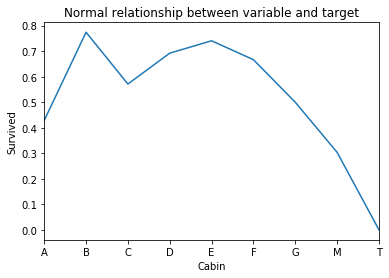

In [16]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

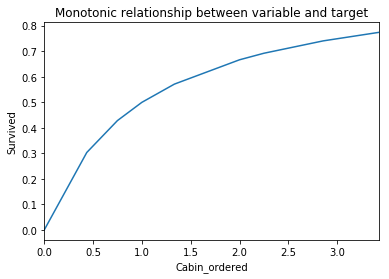

In [17]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

# check the labels
data.Cabin.unique()

### Important

The calculation of the probability ratios to replace the labels should be done considering ONLY on the training set, and then expanded it to the test set.
See below.

# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

# let's calculate the probability of Survived (target=1)
X_train.groupby(['Cabin'])['Survived'].mean()

# let's make a dataframe with the above

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

# now let's  calculate the probability of target = 0 (people who did not survive)
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

#  and now the ratio

prob_df['ratio'] = prob_df.Survived/prob_df.Died
prob_df

# let's make a dictionary with the above ratio

prob_df['ratio'].to_dict()

ordered_labels = prob_df['ratio'].to_dict()

# replace the labels with the ratios

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

# check the results

X_train.head()

# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.



### 6.10.8. Weight of evidence

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default). 

It is computed from the basic odds ratio: ln( (Proportion of Good Credit Outcomes) / (Proportion of Bad Credit Outcomes))

WoE will be 0 if the P(Goods) / P(Bads) = 1. That is, if the outcome is random for that group. If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0; if, on the other hand, P(Goods) > P(Bads) in a group, then WoE > 0.

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

- It establishes a monotonic relationship to the dependent variable.
- It orders the categories on a "logistic" scale which is natural for logistic regression
- The transformed variables, can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has three drawbacks:

- May incur in loss of information (variation) due to binning to few categories (we will discuss this further in the discretisation section)
- It does not take into account correlation between independent variables
- Prone to cause over-fitting

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

148

In [5]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The calculation of the WoE to replace the labels should be done considering the ONLY the training set, and then expanded it to the test set.
See below.

In [7]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [8]:
# now we calculate the probability of target=1 
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [9]:
# let's make a dataframe with the above calculation

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [10]:
# and now the probability of target = 0 
# and we add it to the dataframe

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [11]:
# since the log of zero is not defined, let's set this number to something small and non-zero

prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000010,1.000000


In [12]:
# now we calculate the WoE

prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,WoE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [13]:
# and we create a dictionary to re-map the variable

prob_df['WoE'].to_dict()

{'A': -0.2876820724517809,
 'B': 1.2321436812926321,
 'C': 0.28768207245178085,
 'D': 0.81093021621632877,
 'E': 1.0498221244986774,
 'F': 0.69314718055994518,
 'G': 0.0,
 'M': -0.83016897812423662,
 'T': -11.512925464970229}

In [14]:
# and we make a dictionary to map the orignal variable to the WoE
# same as above but we capture the dictionary in a variable

ordered_labels = prob_df['WoE'].to_dict()

In [15]:
# replace the labels with the WoE

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [16]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.049822
52,D,1,0.810930
386,M,0,-0.830169
124,D,0,0.810930
578,M,0,-0.830169


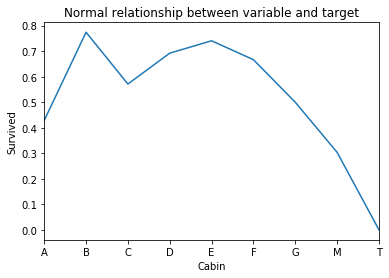

In [17]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

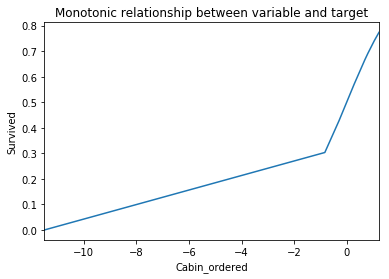

In [18]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

### 6.10.9. Comparison of Categorical variable encoding

In this lecture, I will compare the performance of the different feature transformations we learnt to replace categorical variables.

I will evaluate:

- One hot encoding
- Replacing labels by the count
- Ordering labels according to target
- Replacing labels by Risk
- WoE


In [1]:
import pandas as pd
import numpy as np

import re # to extract text from string

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# let's check how many numerical and categorical variables we have

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# let's drop non-important columns:
# name and ticket have too many different categories, and Passenger Id is a unique key, non informative

data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [5]:
# let's inspect the dataset
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
# let's check for missing data

data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Embarked and Cabin have missing date and are categorical
# let's fill NA values of categorical variables with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.Embarked.fillna('Missing', inplace=True)

In [8]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,M,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,M,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,M,S


In [9]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 9), (268, 9))

In [10]:
# Let's replace null values in age by a value at right end of distribution

def impute_na(df, variable, extreme):
    df[variable].fillna(extreme, inplace=True)
    
impute_na(X_train, 'Age', X_train.Age.mean()+3*X_train.Age.std())
impute_na(X_test, 'Age', X_train.Age.mean()+3*X_train.Age.std()) # note how we calculate the end of the distribution on train set 

C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,1,male,51.00000,0,0,26.5500,E,S
52,1,1,female,49.00000,1,0,76.7292,D,C
386,0,3,male,1.00000,5,2,46.9000,M,S
124,0,1,male,54.00000,0,1,77.2875,D,S
578,0,3,female,73.43632,1,0,14.4583,M,C


In [12]:
# let's check that we have no missing data after NA imputation

X_train.isnull().sum(), X_test.isnull().sum()

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Cabin       0
 Embarked    0
 dtype: int64, Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Cabin       0
 Embarked    0
 dtype: int64)

### One Hot Encoding

In [13]:
def get_OHE(df):
    df_OHE = pd.concat([df[['Age', 'Fare', 'Pclass']], 
                         pd.get_dummies(df[[ 'Sex', 'Cabin', 'Embarked']], drop_first=True)],
                        axis=1
                       )
    return df_OHE

X_train_OHE = get_OHE(X_train)
X_test_OHE = get_OHE(X_test)

X_train_OHE.head()

,Age,Fare,Pclass,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Missing,Embarked_Q,Embarked_S
857,51.00000,26.5500,1,1,0,0,0,1,0,0,0,0,0,0,1
52,49.00000,76.7292,1,0,0,0,1,0,0,0,0,0,0,0,0
386,1.00000,46.9000,3,1,0,0,0,0,0,0,1,0,0,0,1
124,54.00000,77.2875,1,1,0,0,1,0,0,0,0,0,0,0,1
578,73.43632,14.4583,3,0,0,0,0,0,0,0,1,0,0,0,0


In [14]:
X_test_OHE.head()

,Age,Fare,Pclass,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_Q,Embarked_S
495,103.157714,14.4583,3,1,0,0,0,0,0,0,1,0,0
648,103.157714,7.5500,3,1,0,0,0,0,0,0,1,0,1
278,7.000000,29.1250,3,1,0,0,0,0,0,0,1,1,0
31,103.157714,146.5208,1,0,1,0,0,0,0,0,0,0,0
255,29.000000,15.2458,3,0,0,0,0,0,0,0,1,0,0


We can see that the test set does not contain the variables Cabin_T and Embarked_Missing. This occurred because those labels are indeed rare, and therefore, when splitting train and test set, they were only left on the train set. 

Perhaps, it would be a good idea to replace them by the most frequent label, as we learnt in previous sections.

In [15]:
# for now, I will just generate the missing column in the test set and fill it with 0s
# given that no observation in the test set is positive for those labels

X_test_OHE.loc[:, 'Cabin_T'] = 0
X_test_OHE.loc[:, 'Embarked_Missing'] = 0

X_train.shape, X_test.shape

((623, 9), (268, 9))

### Categorical to counts

In [16]:
def categorical_to_counts(df_train, df_test):
    # make a temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in ['Sex', 'Cabin', 'Embarked']:
        # make the dictionary mapping label to counts
        X_frequency_map = df_train_temp[col].value_counts().to_dict()
        
        # remap the labels to their counts
        df_train_temp[col] = df_train_temp[col].map(X_frequency_map)
        df_test_temp[col] = df_test_temp[col].map(X_frequency_map)
    
    # drop the target
    df_train_temp.drop(['Survived'], axis=1, inplace=True)
    df_test_temp.drop(['Survived'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp

X_train_count, X_test_count = categorical_to_counts(X_train, X_test)
X_train_count.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,408,51.00000,0,0,26.5500,27,457
52,1,215,49.00000,1,0,76.7292,26,108
386,3,408,1.00000,5,2,46.9000,471,457
124,1,408,54.00000,0,1,77.2875,26,457
578,3,215,73.43632,1,0,14.4583,471,108


### Categorical to ordered numbers according to target

In [17]:
def categories_to_ordered(df_train, df_test):
    # make a temporary copy of the datasets 
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in [ 'Sex', 'Cabin', 'Embarked']:
        # order the labels according to target mean
        ordered_labels = df_train.groupby([col])['Survived'].mean().sort_values().index
        
        # create the dictionary to map the ordered labels to an ordinal number
        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
        
        # remap the categories  to these ordinal numbers
        df_train_temp[col] = df_train[col].map(ordinal_label)
        df_test_temp[col] = df_test[col].map(ordinal_label)
    
    # remove the target
    df_train_temp.drop(['Survived'], axis=1, inplace=True)
    df_test_temp.drop(['Survived'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp
        
X_train_ordered, X_test_ordered = categories_to_ordered(X_train, X_test)
X_train_ordered.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,0,51.00000,0,0,26.5500,7,0
52,1,1,49.00000,1,0,76.7292,6,2
386,3,0,1.00000,5,2,46.9000,1,0
124,1,0,54.00000,0,1,77.2875,6,0
578,3,1,73.43632,1,0,14.4583,1,2


### Categorical to risk factor

In [18]:
def categories_to_risk(df_train, df_test):
    # temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in ['Sex', 'Cabin', 'Embarked']:
        # make a dictionary mapping labels to the mean target for that label
        risk_dict = df_train.groupby([col])['Survived'].mean().to_dict()
        
        # re-map the labels
        df_train_temp[col] = df_train[col].map(risk_dict)
        df_test_temp[col] = df_test[col].map(risk_dict)
    
    # drop the target
    df_train_temp.drop(['Survived'], axis=1, inplace=True)
    df_test_temp.drop(['Survived'], axis=1, inplace=True)        
    return df_train_temp, df_test_temp
        
X_train_risk, X_test_risk = categories_to_risk(X_train, X_test)
X_train_risk.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,0.196078,51.00000,0,0,26.5500,0.740741,0.341357
52,1,0.753488,49.00000,1,0,76.7292,0.692308,0.564815
386,3,0.196078,1.00000,5,2,46.9000,0.303609,0.341357
124,1,0.196078,54.00000,0,1,77.2875,0.692308,0.341357
578,3,0.753488,73.43632,1,0,14.4583,0.303609,0.564815


### WoE

In [19]:
def categories_to_woe(df_train, df_test):
    # temporary copy of datafranes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in [ 'Sex', 'Cabin', 'Embarked']:
        # create df containing the different parts of the WoE equation
        prob_df = X_train.groupby([col])['Survived'].mean()
        prob_df = pd.DataFrame(prob_df)
        prob_df['Died'] = 1-prob_df.Survived
        
        # remove zero values as the log of zero does not exist
        prob_df.loc[prob_df.Died == 0, 'Died'] = 0.00001
        prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
        
        # calculate WoE
        prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
        woe = prob_df['WoE'].to_dict()
        
        # re-map the labels to WoE
        df_train_temp[col] = df_train[col].map(woe)
        df_test_temp[col] = df_test[col].map(woe)
    
    # drop the target
    df_train_temp.drop(['Survived'], axis=1, inplace=True)
    df_test_temp.drop(['Survived'], axis=1, inplace=True)        
    return df_train_temp, df_test_temp
        
X_train_woe, X_test_woe = categories_to_woe(X_train, X_test)
X_train_woe.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
857,1,-1.410987,51.00000,0,0,26.5500,1.049822,-0.657254
52,1,1.117304,49.00000,1,0,76.7292,0.810930,0.260726
386,3,-1.410987,1.00000,5,2,46.9000,-0.830169,-0.657254
124,1,-1.410987,54.00000,0,1,77.2875,0.810930,-0.657254
578,3,1.117304,73.43632,1,0,14.4583,-0.830169,0.260726


### Random Forest Performance

In [20]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [21]:
# OHE
run_randomForests(X_train_OHE, X_test_OHE, y_train, y_test)

Train set
Random Forests roc-auc: 0.8823669768551659
Test set
Random Forests roc-auc: 0.8705059523809523


In [22]:
# counts
run_randomForests(X_train_count, X_test_count, y_train, y_test)

Train set
Random Forests roc-auc: 0.8935435240016485
Test set
Random Forests roc-auc: 0.8820833333333333


In [23]:
# ordered labels
run_randomForests(X_train_ordered, X_test_ordered, y_train, y_test)

Train set
Random Forests roc-auc: 0.8931530769397628
Test set
Random Forests roc-auc: 0.8794345238095238


In [24]:
# risk factor
run_randomForests(X_train_risk, X_test_risk, y_train, y_test)

Train set
Random Forests roc-auc: 0.8931422311880436
Test set
Random Forests roc-auc: 0.879375


In [25]:
# woe
run_randomForests(X_train_woe, X_test_woe, y_train, y_test)

Train set
Random Forests roc-auc: 0.8931422311880436
Test set
Random Forests roc-auc: 0.879375


Comparing the roc_auc values on the test sets, we can see that we obtain the best performance of random forests when we train the algorithms on the variables engineered with some intelligence: this is, replacing labels by risk, WoE or ordered numbers. Although, the performances of the different trees for the different categorical engineering methods are quite similar.

### Logistic Regression Performance

In [26]:
def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [27]:
# OHE
run_logistic(X_train_OHE, X_test_OHE, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8518524543936141
Test set
Logistic Regression roc-auc: 0.8429761904761905


In [28]:
# counts
run_logistic(X_train_count, X_test_count, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8546343897095507
Test set
Logistic Regression roc-auc: 0.8510119047619048


In [29]:
# ordered labels
run_logistic(X_train_ordered, X_test_ordered, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8561419491984991
Test set
Logistic Regression roc-auc: 0.8505357142857143


In [30]:
# risk factor
run_logistic(X_train_risk, X_test_risk, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8531919047309168
Test set
Logistic Regression roc-auc: 0.8498214285714285


In [31]:
# woe
run_logistic(X_train_woe, X_test_woe, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8555996616125464
Test set
Logistic Regression roc-auc: 0.8514285714285714


For Logistic regression, the best performance is obtained when we replace the categories by their counts.

### Gradient Boosting Trees Performance

In [32]:
from xgboost import XGBClassifier

def run_xgb(X_train, X_test, y_train, y_test):
    # function to train and test gradient boosting trees
    # using the xgboost package
    
    xgb_model = XGBClassifier(random_state=44, max_depth=2)
    xgb_model.fit(X_train, y_train)
    print('Train set')
    pred = xgb_model.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = xgb_model.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [33]:
# OHE

# the xgb package requires that both datasets show the columns in the same order, so I pass
# the columns in brackets to make sure this is the case

run_xgb(X_train_OHE[X_train_OHE.columns], X_test_OHE[X_train_OHE.columns], y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9004414220949655
Test set
Logistic Regression roc-auc: 0.8898214285714285


In [34]:
# counts
run_xgb(X_train_count, X_test_count, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9082503633326826
Test set
Logistic Regression roc-auc: 0.885297619047619


In [35]:
# ordered labels
run_xgb(X_train_ordered, X_test_ordered, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9063198195266913
Test set
Logistic Regression roc-auc: 0.8844642857142858


In [36]:
# risk factor
run_xgb(X_train_risk, X_test_risk, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9063198195266913
Test set
Logistic Regression roc-auc: 0.8844642857142858


In [37]:
# woe
run_xgb(X_train_woe, X_test_woe, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9063198195266913
Test set
Logistic Regression roc-auc: 0.8844642857142858


For xgboost, we obtain the highest performance when the features are encoded using OHE.

### Conclusions

Different machine learning algorithms benefit of different ways of preprocessing categorical variables. 